In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Reading datasets
dfs = []
for i in range(1,5):
    path = 'UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)

# This csv file contains names of all the features
df_col = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
data.columns = df_col['Name']
dataSet = data
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [2]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [33]:
dataSet['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [34]:
dataSet['attack_cat'] = dataSet.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())
dataSet['attack_cat'] = dataSet['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())
dataSet['attack_cat'].unique()


array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

In [35]:

 # Cleaning the data
# Convert the column to numeric type
dataSet['ct_ftp_cmd'] = pd.to_numeric(dataSet['ct_ftp_cmd'], errors='coerce')

# Calculate the median and replace null values
val = dataSet['ct_ftp_cmd'].median()
dataSet['ct_ftp_cmd'] = dataSet['ct_ftp_cmd'].fillna(value=val)
for col in dataSet.columns:
    if dataSet[col].dtypes == 'object' :
        val = dataSet[col].mode().values[0]  # Mode value of the column in train data
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    else:
        val = dataSet[col].median()
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    print(col,val)

srcip 59.166.0.4
sport 1043
dstip 149.171.126.3
dsport 53
proto tcp
state FIN
dur 0.015861
sbytes 1470.0
dbytes 1820.0
sttl 31.0
dttl 29.0
sloss 3.0
dloss 4.0
service -
sload 589303.75
dload 589317.875
spkts 12.0
dpkts 12.0
swin 255.0
dwin 255.0
stcpb 639725026.0
dtcpb 638417164.0
smeansz 73.0
dmeansz 89.0
trans_depth 0.0
res_bdy_len 0.0
sjit 19.124899
djit 2.653561
stime 1424226977.0
ltime 1424226978.0
sintpkt 0.468262
dintpkt 0.414755
tcprtt 0.000613
synack 0.000483
ackdat 0.000122
is_sm_ips_ports 0.0
ct_state_ttl 0.0
ct_flw_http_mthd 0.0
is_ftp_login 0.0
ct_ftp_cmd 0.0
ct_srv_src 5.0
ct_srv_dst 5.0
ct_dst_ltm 3.0
ct_src_ltm 4.0
ct_src_dport_ltm 1.0
ct_dst_sport_ltm 1.0
ct_dst_src_ltm 2.0
attack_cat normal
label 0.0


In [36]:
# Fixing binary columns 
dataSet['is_ftp_login'] = np.where(dataSet['is_ftp_login']>1, 1, dataSet['is_ftp_login'])
for col in dataSet.columns:
    print(col)
    print(dataSet[col].unique())

srcip
['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
sport
['1390' '33661' '1464' ... 533 933 706]
dstip
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.1

['dns' '-' 'http' 'smtp' 'ftp-data' 'ftp' 'ssh' 'pop3' 'snmp' 'ssl' 'irc'
 'radius' 'dhcp']
sload
[500473.9375   87676.08594 521894.5313  ...  12496.51367 198981.25
  24465.67188]
dload
[  621800.9375     50480.17188   636282.375   ...   598375.0625
 10915975.        146610.7656 ]
spkts
[    2     4     1    12    14    10     6    26    32     5    20    18
     8    16    28    30    64    66     3    24    42    52    78    80
    40   334    38    22   122   106    62    54    44   110   108   364
   112   456   448   446   442   452   454   460   450    76   680   672
   568   668   572   562   440   444   428   662   556   338   226   228
   222   230   296   234   204   206    48    68   218   372   240   238
   294    50   366    70   358    90   362   114   210   356   224   232
   216   212    92   242    60   244   350   214   340   354   208    34
   286    46   236   310   292    36   130   360    88   220   104    72
   252   352   198   200   308   118   290   282   346 

['normal' 'exploits' 'reconnaissance' 'dos' 'generic' 'shellcode'
 'fuzzers' 'worms' 'backdoor' 'analysis']
label
[0 1]


In [37]:
dataSet.drop(['label','stime','ltime'], axis=1, inplace=True)

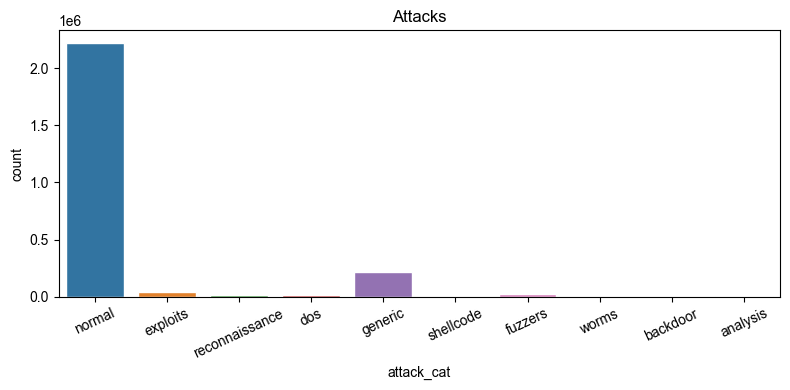

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
    # countplot of the given column
ax = sns.countplot(x='attack_cat',  data=dataSet)
ax.set_title("Attacks")
plt.xticks(rotation=25)
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNSWNB15_Attacks.png', dpi=300, format='png')
plt.show()

In [38]:
dataSet['attack_cat'].replace({ 'dos' : 1, 'normal':0, 'reconnaissance':0, 'backdoor':0, 'exploits':0,
       'analysis':0, 'fuzzers':0, 'worms':0, 'shellcode':0, 'generic':0},inplace = True)
for col_name in dataSet.columns:
    if dataSet[col_name].dtypes == 'object' :
        unique_cat = len(dataSet[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['srcip','sport','dstip','dsport','proto','service','state'] 
for f in features:
    dataSet[f] = dataSet[f].astype(str)
for f in features:
    dataSet[f] = le.fit_transform(dataSet[f]) 

Feature 'srcip' has 43 categories
Feature 'sport' has 129124 categories
Feature 'dstip' has 47 categories
Feature 'dsport' has 64630 categories
Feature 'proto' has 135 categories
Feature 'state' has 16 categories
Feature 'service' has 13 categories


Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,33,4276,24,47344,120,2,0.001055,132,164,31,...,0.0,0.0,3,7,1,3,1,1,1,0
1,33,26036,27,253,120,2,0.036133,528,304,31,...,0.0,0.0,2,4,2,3,1,1,2,0
2,39,5091,25,47344,120,2,0.001119,146,178,31,...,0.0,0.0,12,8,1,2,2,1,1,0
3,38,28534,23,47344,120,2,0.001209,132,164,31,...,0.0,0.0,6,9,1,1,1,1,1,0
4,36,43654,8,47344,120,2,0.001169,146,178,31,...,0.0,0.0,7,9,1,1,1,1,1,0


In [39]:
x = dataSet.iloc[:,0:45]
y = dataSet.iloc[:,45]

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

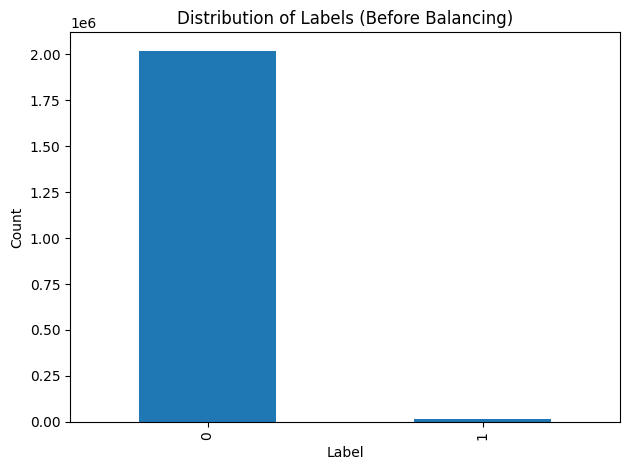

In [40]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNBALANCED.png', dpi=300, format='png')
plt.show()

In [41]:
y_train.value_counts()

attack_cat
0    2018955
1      13082
Name: count, dtype: int64

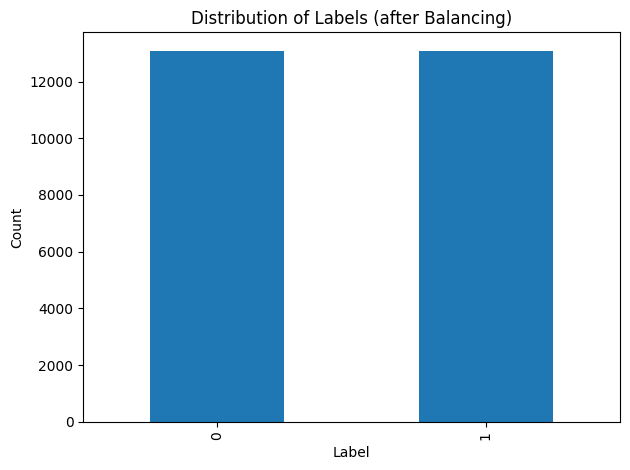

In [42]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('BALANCED.png', dpi=300, format='png')
plt.show()

In [43]:
y_train.value_counts()

attack_cat
0    13082
1    13082
Name: count, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
# fit models and make predictions
models = [Rf, dt,Lr,kNN,NB, svm]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','Naive Bayes Classifier','SVM']
results = []
i=0
for model in models:
    model.fit(x_train,y_train)
    dump(model, 'U'+model_names[i]+'InitState.joblib')
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1

# create dataframe with results
metrics_df_init = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_init)

                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.971914   0.186284  0.998166  0.313972        14262  \
DecisionTreeClassifier  0.971398   0.181571  0.981351  0.306444        14469   
LogisticRegression      0.754253   0.023083  0.899419  0.045010       124513   
K-Nearest Neighbors     0.928281   0.077789  0.933965  0.143616        36218   
Naive Bayes Classifier  0.753458   0.021325  0.830633  0.041582       124692   
SVM                     0.577376   0.012299  0.815041  0.024233       214092   

                        False Alarm Rate                 Confusion Matrix  
RandomForestClassifier          0.028256     [[490477, 14262], [6, 3265]]  
DecisionTreeClassifier          0.028666    [[490270, 14469], [61, 3210]]  
LogisticRegression              0.246688  [[380226, 124513], [329, 2942]]  
K-Nearest Neighbors             0.071756   [[468521, 36218], [216, 3055]]  
Naive Bayes Classifier          0.247043  [[380047, 124692]

In [39]:
from sklearn.preprocessing import MinMaxScaler
from joblib import dump
scaler = MinMaxScaler()
scaler.fit(x)

#dump(scaler, 'UnswScaler.joblib')

x=pd.DataFrame(scaler.transform(x),
            columns=x.columns, index=x.index) 



x.head(20)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.785714,0.066193,0.521739,0.732550,0.895522,0.133333,1.200687e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.0,0.030303,0.090909,0.000000,0.030303,0.000000,0.000000,0.000000
1,0.785714,0.403040,0.586957,0.003915,0.895522,0.133333,4.112267e-06,0.000037,0.000021,0.121569,...,0.0,0.0,0.0,0.015152,0.045455,0.015152,0.030303,0.000000,0.000000,0.015152
2,0.928571,0.078809,0.543478,0.732550,0.895522,0.133333,1.273525e-07,0.000010,0.000012,0.121569,...,0.0,0.0,0.0,0.166667,0.106061,0.000000,0.015152,0.015152,0.000000,0.000000
3,0.904762,0.441710,0.500000,0.732550,0.895522,0.133333,1.375953e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.0,0.075758,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.857143,0.675769,0.173913,0.732550,0.895522,0.133333,1.330429e-07,0.000010,0.000012,0.121569,...,0.0,0.0,0.0,0.090909,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.785714,0.376755,0.586957,0.018598,0.895522,0.133333,8.915697e-06,0.000040,0.000021,0.121569,...,0.0,0.0,0.0,0.015152,0.045455,0.015152,0.030303,0.000000,0.000000,0.015152
6,0.928571,0.194384,0.478261,0.732550,0.895522,0.133333,1.290596e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.0,0.166667,0.090909,0.000000,0.015152,0.015152,0.000000,0.000000
7,0.047619,0.000015,0.043478,0.000015,0.044776,0.400000,0.000000e+00,0.000003,0.000000,0.000000,...,0.0,0.0,0.0,0.015152,0.015152,0.015152,0.015152,0.015152,0.016949,0.015152
8,0.904762,0.523414,0.521739,0.732550,0.895522,0.133333,1.281491e-07,0.000010,0.000012,0.121569,...,0.0,0.0,0.0,0.075758,0.090909,0.030303,0.000000,0.000000,0.000000,0.000000
9,0.952381,0.045063,0.478261,0.732550,0.895522,0.133333,1.328153e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.0,0.075758,0.090909,0.015152,0.000000,0.000000,0.000000,0.000000


In [40]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

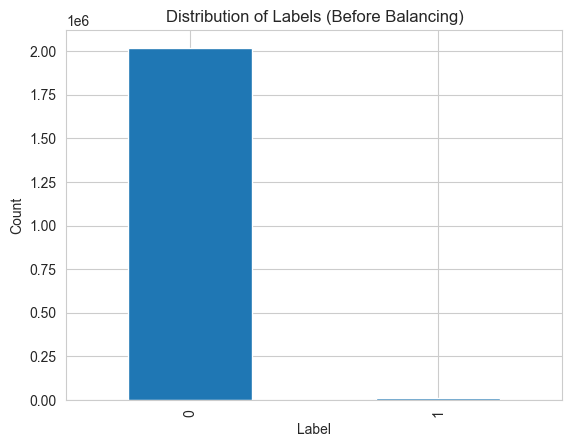

In [41]:
# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

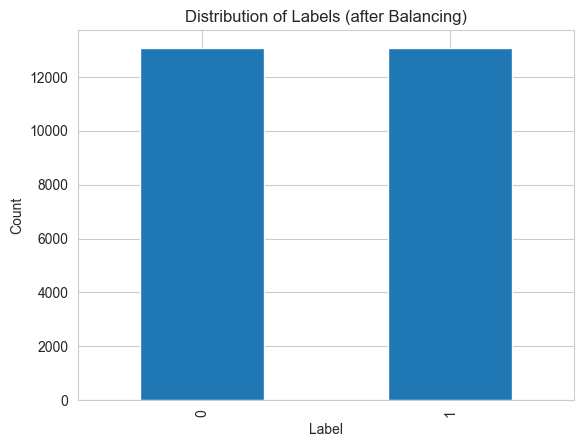

In [42]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
plt.show()

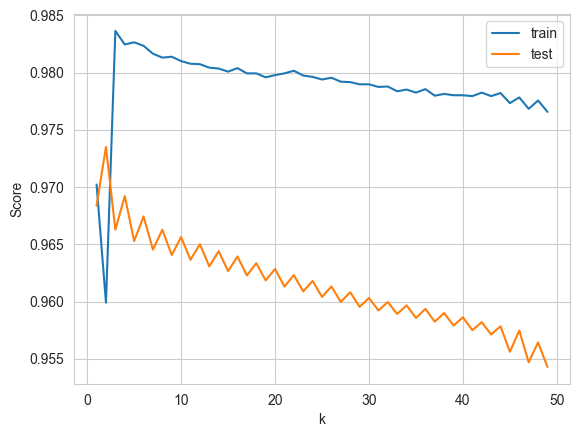

In [20]:
from sklearn.neighbors import KNeighborsClassifier

kNN_accuracy_test = []
kNN_accuracy_train = []


for k in range(1,50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski', p=1)
    kNN.fit(x_train,y_train)
    kNN_accuracy_train.append(kNN.score(x_train,y_train))
    kNN_accuracy_test.append(kNN.score(x_test,y_test))
    
plt.plot(np.arange(1,50), kNN_accuracy_train, label = 'train')
plt.plot(np.arange(1,50), kNN_accuracy_test, label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],  # Add or modify kernel options as needed
              'gamma': [1, 0.1, 0.01, 0.001]}  # Add or modify gamma values as needed

grid = GridSearchCV(SVC(), parameters, refit=True, verbose=2, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

best_params_svm = grid.best_params_
print(best_params_svm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   7.7s
[CV] END ................................gamma=1, kernel=rbf; total time=   7.6s
[CV] END ................................gamma=1, kernel=rbf; total time=   6.6s
[CV] END ................................gamma=1, kernel=rbf; total time=   6.7s
[CV] END ................................gamma=1, kernel=rbf; total time=   6.5s
[CV] END .............................gamma=1, kernel=linear; total time=   6.5s
[CV] END .............................gamma=1, kernel=linear; total time=   5.9s
[CV] END .............................gamma=1, kernel=linear; total time=   6.2s
[CV] END .............................gamma=1, kernel=linear; total time=   5.9s
[CV] END .............................gamma=1, kernel=linear; total time=   6.1s
[CV] END ...............................gamma=1, kernel=poly; total time=   9.7s
[CV] END ...............................gamma=1,

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[130,150],
             'max_depth': range(20,30,1),
             'min_samples_leaf':range(10,20,1),
             }

grid = GridSearchCV(RandomForestClassifier(random_state=88),parameters, refit = True, verbose=3, scoring='neg_mean_squared_error')

grid.fit(x_train,y_train)

best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END max_depth=20, min_samples_leaf=10, n_estimators=130;, score=-0.018 total time=   3.7s
[CV 2/5] END max_depth=20, min_samples_leaf=10, n_estimators=130;, score=-0.017 total time=   3.2s
[CV 3/5] END max_depth=20, min_samples_leaf=10, n_estimators=130;, score=-0.019 total time=   3.0s
[CV 4/5] END max_depth=20, min_samples_leaf=10, n_estimators=130;, score=-0.016 total time=   2.8s
[CV 5/5] END max_depth=20, min_samples_leaf=10, n_estimators=130;, score=-0.018 total time=   4.6s
[CV 1/5] END max_depth=20, min_samples_leaf=10, n_estimators=150;, score=-0.018 total time=   7.4s
[CV 2/5] END max_depth=20, min_samples_leaf=10, n_estimators=150;, score=-0.017 total time=   8.3s
[CV 3/5] END max_depth=20, min_samples_leaf=10, n_estimators=150;, score=-0.019 total time=   3.2s
[CV 4/5] END max_depth=20, min_samples_leaf=10, n_estimators=150;, score=-0.016 total time=   3.2s
[CV 5/5] END max_depth=20, min_samples_leaf=1

KeyboardInterrupt: 

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB ,svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(x_train,y_train)
    dump(model, 'U'+model_names[i]+'Normalization.joblib')
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_normalization = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_normalization)

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.971853   0.185991  0.998471  0.313571        14294  \
DecisionTreeClassifier  0.971347   0.181269  0.981046  0.305998        14494   
LogisticRegression      0.943306   0.101193  0.990217  0.183622        28769   
K-Nearest Neighbors     0.962316   0.145011  0.991134  0.253005        19115   
KNNWithBestParam        0.973506   0.184465  0.910425  0.306773        13166   
Naive Bayes Classifier  0.938478   0.092975  0.977071  0.169792        31179   
SVM                     0.949347   0.112675  0.998777  0.202504        25728   
SVMWithBestParam        0.961749   0.143607  0.995414  0.251002        19417   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.028320    [[490445, 14294], [5, 3266]]  
DecisionTreeClassifier          0.028716   [[490245, 14494], [62, 3209]]  
LogisticRegression              0.056998   [[475970, 2

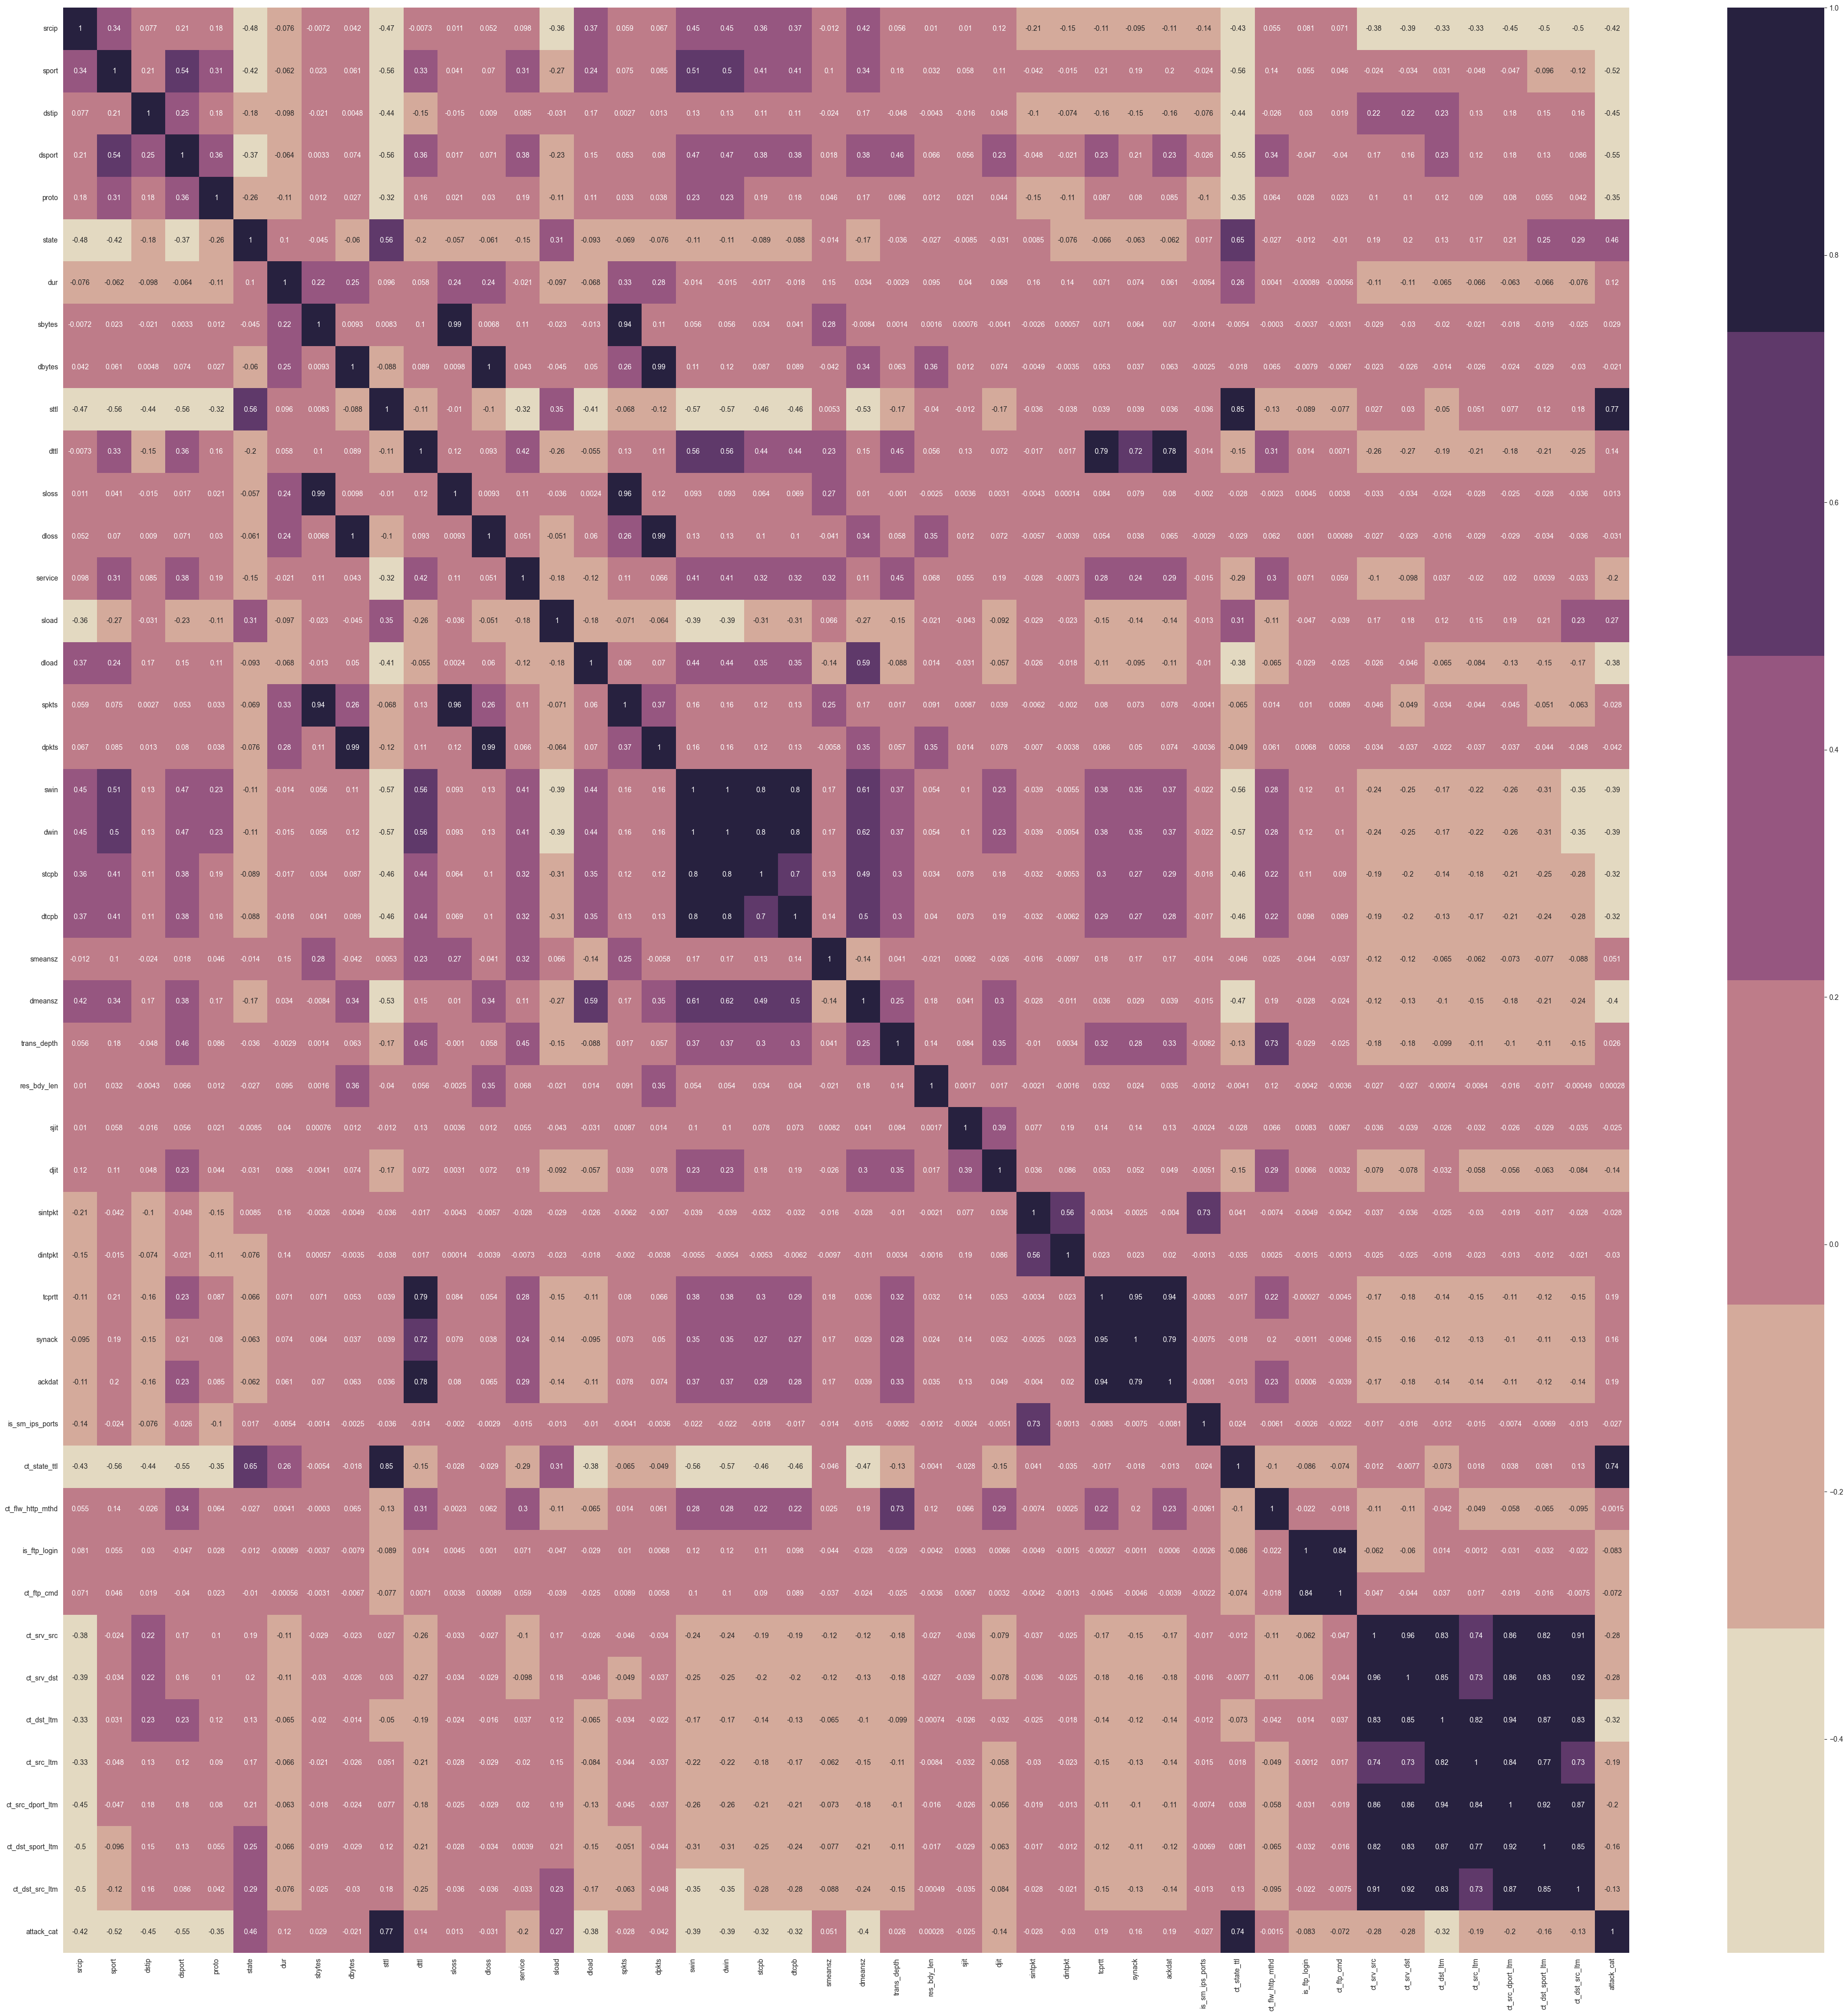

In [41]:
train = pd.concat([x_train,y_train],axis=1)
#corr=train.corr()
#train.head(20)
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, cmap= sns.color_palette("ch:s=-.2, r=.6"),annot=True)
plt.show()

In [42]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)

['dloss', 'dpkts', 'dwin']


In [43]:
X_train_selected = x_train.drop(['dloss', 'dpkts', 'dwin'], axis=1)
X_test_selected = x_test.drop(['dloss', 'dpkts', 'dwin'], axis=1)
X_train_selected.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.738095,0.007012,0.391304,0.732550,0.895522,0.400000,2.276184e-10,0.000008,0.000000,0.996078,...,0.000000,0.0,0.000,0.303030,0.303030,0.090909,0.106061,0.090909,0.050847,0.303030
1,0.809524,0.613229,0.500000,0.187346,0.850746,0.333333,2.864691e-06,0.000204,0.000255,0.121569,...,0.000000,1.0,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.809524,0.114119,0.478261,0.951245,0.850746,0.333333,2.131760e-06,0.000107,0.000112,0.121569,...,0.000000,0.0,0.000,0.121212,0.090909,0.106061,0.136364,0.075758,0.000000,0.075758
3,0.904762,0.883466,0.456522,0.018598,0.895522,0.133333,5.359274e-07,0.000040,0.000021,0.121569,...,0.000000,0.0,0.000,0.136364,0.136364,0.015152,0.015152,0.000000,0.000000,0.030303
4,1.000000,0.898218,0.500000,0.968698,0.850746,0.333333,1.244831e-04,0.000110,0.000694,0.121569,...,0.027778,0.0,0.000,0.015152,0.030303,0.045455,0.030303,0.000000,0.000000,0.000000


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(X_train_selected,y_train)
    dump(model, 'U'+model_names[i]+'ColumnsCorr.joblib')
    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_Columns_Corr = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_Corr)

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.971717   0.185227  0.998166  0.312470        14362  \
DecisionTreeClassifier  0.971219   0.180570  0.980740  0.304986        14558   
LogisticRegression      0.943277   0.101121  0.989911  0.183498        28783   
K-Nearest Neighbors     0.962333   0.145069  0.991134  0.253093        19106   
KNNWithBestParam        0.973489   0.184245  0.909508  0.306417        13172   
Naive Bayes Classifier  0.935001   0.088636  0.979823  0.162567        32954   
SVM                     0.949440   0.112858  0.998777  0.202800        25681   
SVMWithBestParam        0.961574   0.143014  0.995109  0.250086        19505   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.028454    [[490377, 14362], [6, 3265]]  
DecisionTreeClassifier          0.028843   [[490181, 14558], [63, 3208]]  
LogisticRegression              0.057026   [[475956, 2

In [46]:
corr = train.corr()
cor_target=corr['attack_cat']
relevant_features= cor_target[(cor_target > 0.2)|(cor_target < -0.1)]
names=[index for index, value in relevant_features.items()]
names.remove('attack_cat')
print(names)

# DecisionTrees:
X_train_selected = x_train[names]
X_test_selected = x_test[names]

['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'sttl', 'service', 'sload', 'dload', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmeansz', 'djit', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(X_train_selected,y_train)
    dump(model, 'U'+model_names[i]+'LabelCorr.joblib')
    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_label_Corr = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_label_Corr)

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.970630   0.179638  0.998471  0.304494        14915  \
DecisionTreeClassifier  0.972438   0.187453  0.983797  0.314904        13949   
LogisticRegression      0.938411   0.093214  0.981351  0.170256        31227   
K-Nearest Neighbors     0.960790   0.139685  0.986548  0.244720        19875   
KNNWithBestParam        0.971839   0.175116  0.909202  0.293670        14009   
Naive Bayes Classifier  0.951064   0.109447  0.924794  0.195730        24614   
SVM                     0.948468   0.110964  0.998777  0.199737        26175   
SVMWithBestParam        0.958784   0.134783  0.996637  0.237454        20927   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.029550    [[489824, 14915], [5, 3266]]  
DecisionTreeClassifier          0.027636   [[490790, 13949], [53, 3218]]  
LogisticRegression              0.061868   [[473512, 3

In [43]:
from sklearn.feature_selection import SelectFromModel


# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
selector =SelectFromModel(RandomForestClassifier(random_state=88))

# Train the classifier using the training set
selector.fit(x_train, y_train)

# Get the feature importances
selector.get_support()
# Sort the features based on their importances in descending order
selected_features=x_train.columns[(selector.get_support())]

print('nbr of features selected  ',len(selected_features))

print(' features selected  ',selected_features)
dump((selector, selected_features), 'RfSel.joblib')

nbr of features selected   16
 features selected   Index(['srcip', 'sport', 'dstip', 'dsport', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'dload', 'dpkts', 'dmeansz', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst',
       'ct_src_dport_ltm', 'ct_dst_src_ltm'],
      dtype='object', name='Name')


['RfSel.joblib']

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param =  KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(x_train.loc[:, selected_features], y_train)
    dump(model, 'U'+model_names[i]+'RfFeatureSelection.joblib')
    y_pred = model.predict(x_test.loc[:, selected_features])
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_Rf_feature_selection = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_Rf_feature_selection)

                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.972426   0.189125  0.998471  0.318014        14003  \
DecisionTreeClassifier  0.972109   0.185937  0.986243  0.312885        14124   
LogisticRegression      0.940763   0.097098  0.988077  0.176820        30054   
K-Nearest Neighbors     0.965152   0.147759  0.925405  0.254830        17459   
KNNWithBestParam        0.975443   0.157946  0.649648  0.254111        11329   
Naive Bayes Classifier  0.944430   0.101866  0.976154  0.184481        28152   
SVM                     0.949824   0.113623  0.998777  0.204034        25486   
SVMWithBestParam        0.955599   0.126448  0.997860  0.224453        22549   

                        False Alarm Rate                 Confusion Matrix  
RandomForestClassifier          0.027743     [[490736, 14003], [5, 3266]]  
DecisionTreeClassifier          0.027983    [[490615, 14124], [45, 3226]]  
LogisticRegression              0.059544    [[47468

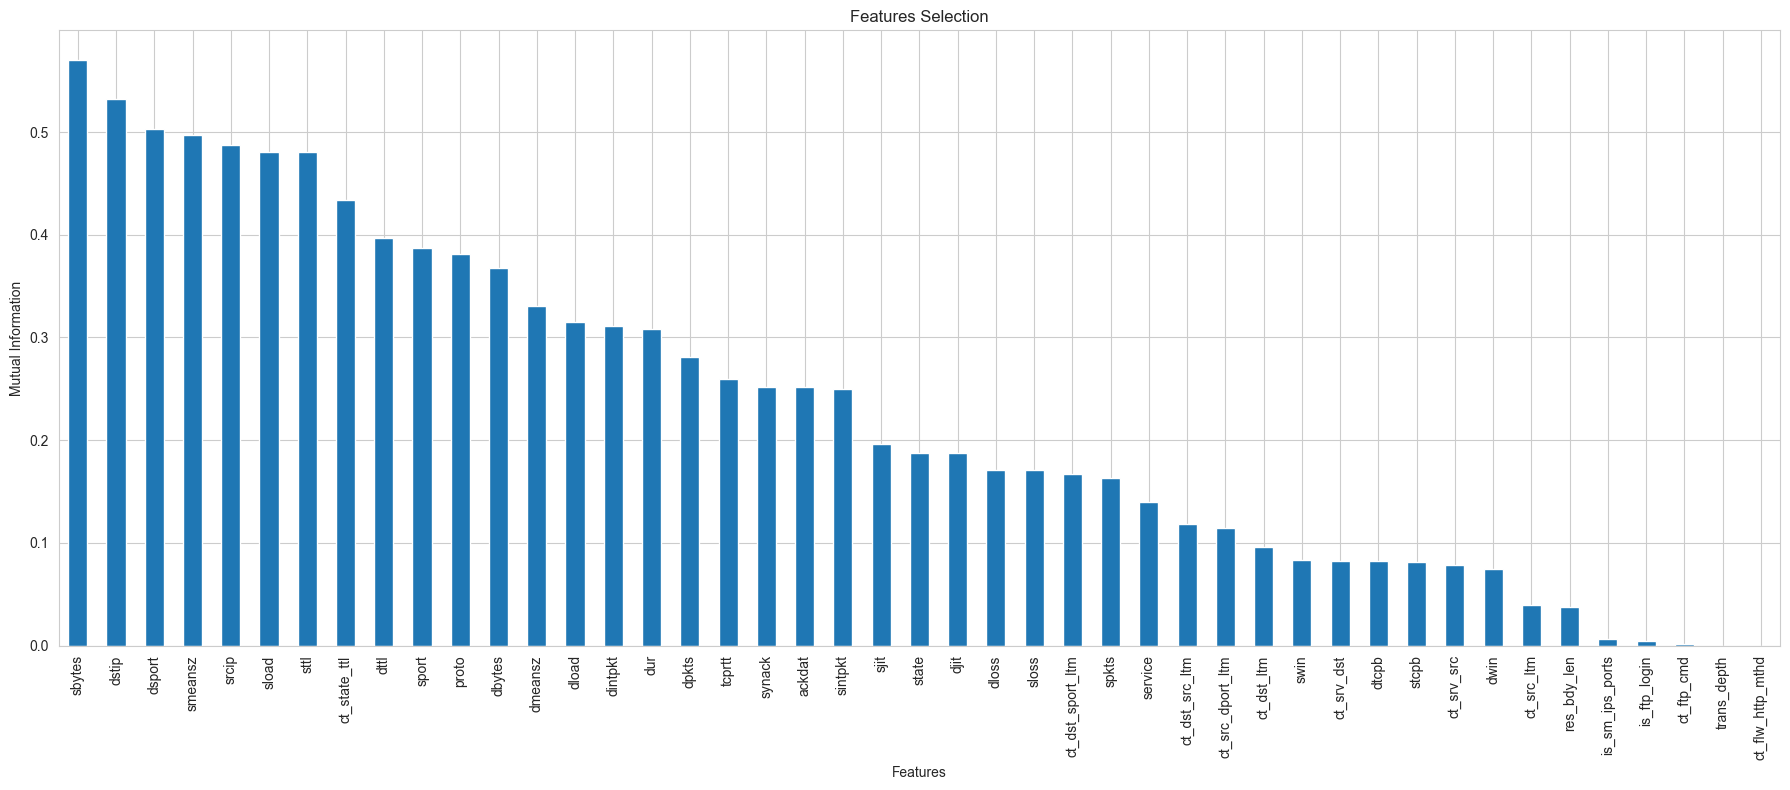

In [45]:
from sklearn.feature_selection import mutual_info_classif

import pandas as pd
import matplotlib.pyplot as plt

# Example feature selection using mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
sorted_mutual_info = mutual_info.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(18, 8))
sorted_mutual_info.plot.bar()

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Features Selection')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('UNSWNB15_mutualInfo.png', dpi=300, format='png')


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=21)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = x_train.columns[selected_features_indices]
print("Selected features:", selected_features)
dump((selector, selected_features), 'MutualInfoSelection.joblib')

Selected features: Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'dur', 'sbytes', 'dbytes',
       'sttl', 'dttl', 'sload', 'dload', 'dpkts', 'smeansz', 'dmeansz',
       'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_state_ttl'],
      dtype='object', name='Name')


['MutualInfoSelection.joblib']

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump
# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param =  KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(X_train_new, y_train)
    dump(model, 'U'+model_names[i]+'MutualInfoClassif.joblib')
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_mutual_info_classif = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_mutual_info_classif)

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.970632   0.179648  0.998471  0.304508        14914  \
DecisionTreeClassifier  0.973707   0.194438  0.981046  0.324551        13295   
LogisticRegression      0.939985   0.094973  0.975543  0.173095        30408   
K-Nearest Neighbors     0.963753   0.141755  0.915928  0.245513        18139   
KNNWithBestParam        0.976304   0.172751  0.707429  0.277691        11081   
Naive Bayes Classifier  0.864119   0.044473  0.981351  0.085091        68968   
SVM                     0.950881   0.114638  0.985937  0.205394        24907   
SVMWithBestParam        0.951178   0.115587  0.989606  0.206996        24768   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.029548    [[489825, 14914], [5, 3266]]  
DecisionTreeClassifier          0.026340   [[491444, 13295], [62, 3209]]  
LogisticRegression              0.060245   [[474331, 3

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from joblib import dump
# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param =  KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)


estimator = RandomForestClassifier(random_state=88)

# Create an instance of the feature selector (RFE)
selector = RFE(estimator)  # Select features

# Fit the selector to the training data
selector.fit(x_train, y_train)

# Transform the training and testing data using the selected features
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = x_train.columns[selected_features_indices]
dump((selector, selected_features), 'RFESel.joblib')
# fit models and make predictions
models = [Rf,dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(x_train_selected, y_train)
    dump(model, 'U'+model_names[i]+'RFE.joblib')
    y_pred = model.predict(x_test_selected)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_RFE = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_RFE)

                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.972113   0.187364  0.998166  0.315505        14161  \
DecisionTreeClassifier  0.971670   0.183289  0.983797  0.309007        14339   
LogisticRegression      0.940934   0.097134  0.985326  0.176835        29958   
K-Nearest Neighbors     0.965757   0.157343  0.991440  0.271585        17368   
KNNWithBestParam        0.975849   0.193612  0.869153  0.316681        11841   
Naive Bayes Classifier  0.944972   0.102128  0.968511  0.184772        27852   
SVM                     0.950397   0.114758  0.998471  0.205855        25194   
SVMWithBestParam        0.958322   0.133486  0.996637  0.235439        21162   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.028056    [[490578, 14161], [6, 3265]]  
DecisionTreeClassifier          0.028409   [[490400, 14339], [53, 3218]]  
LogisticRegression              0.059353   [[474781, 2

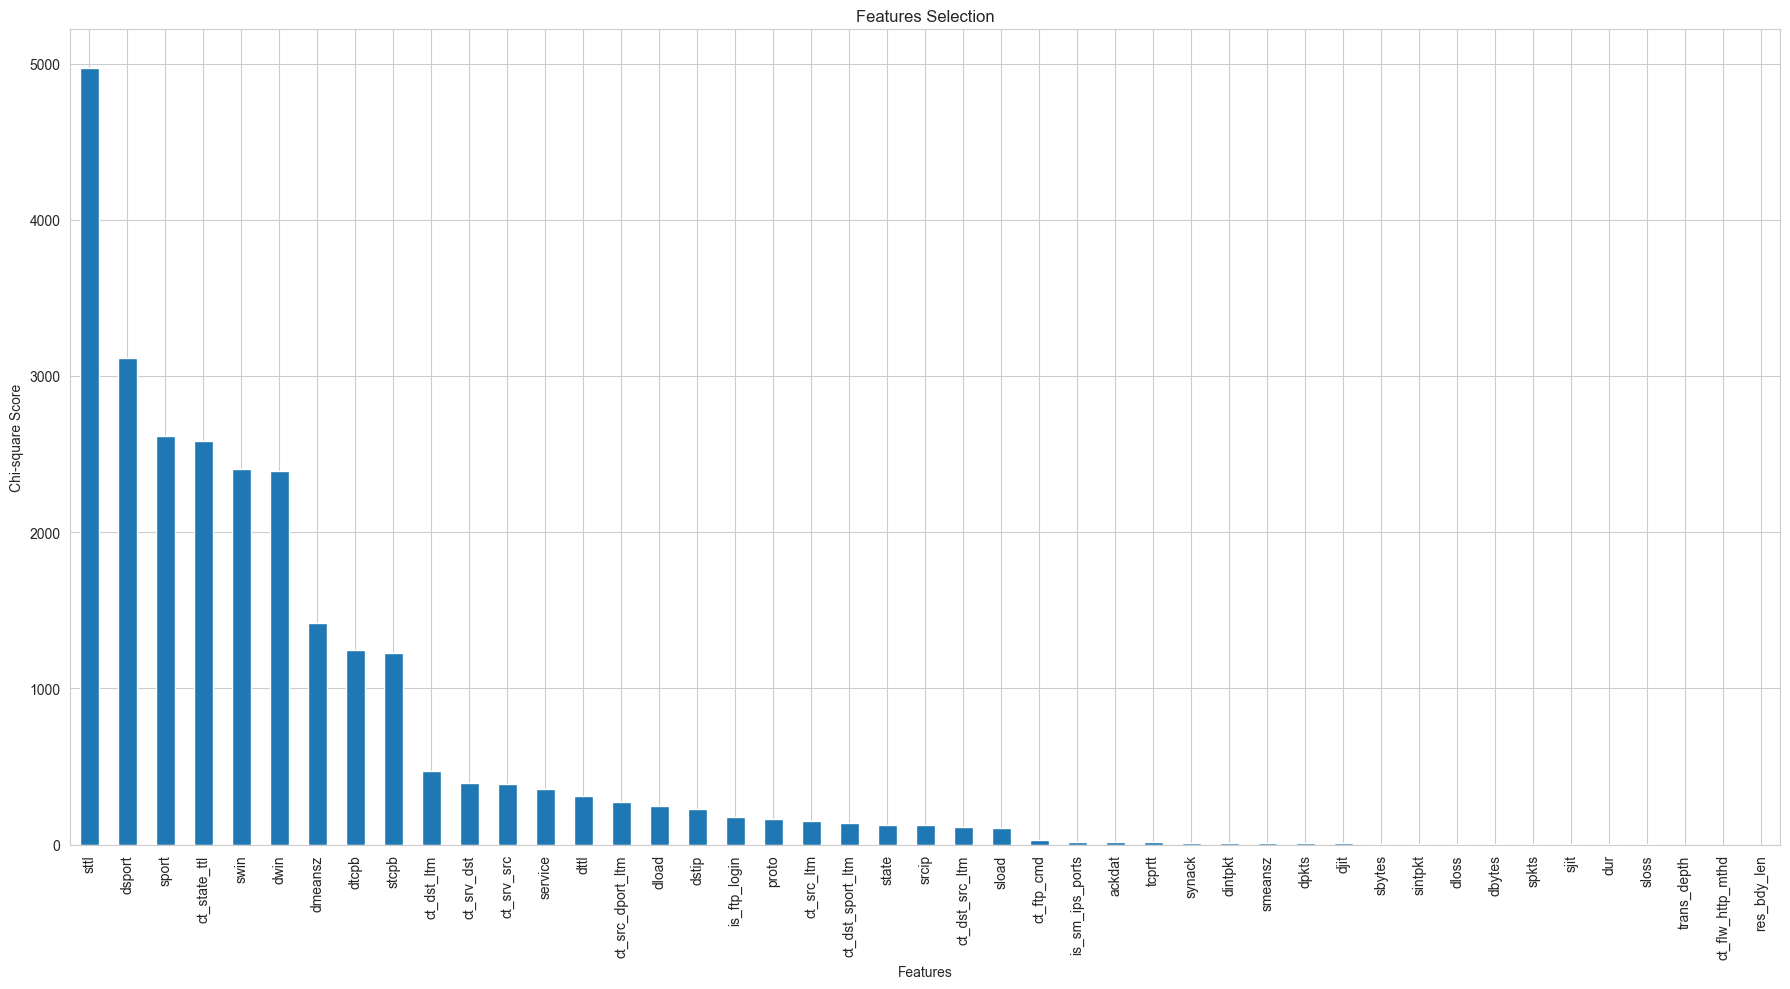

In [49]:
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt

chi_scores, p_values = chi2(x_train, y_train)
chi_scores = pd.Series(chi_scores)
p_values = pd.Series(p_values)
chi_scores.index = p_values.index = x_train.columns
sorted_chi_scores = chi_scores.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(18, 10))
sorted_chi_scores.plot.bar()

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Chi-square Score')
plt.title('Features Selection')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('UNSWNB15_chi2.png', dpi=300, format='png')


In [50]:
from sklearn.feature_selection import SelectKBest

# Feature extraction
selector = SelectKBest(score_func=chi2, k=9)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)
# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = x_train.columns[selected_features_indices]
print("Selected features:", selected_features)
dump((selector, selected_features), 'Chi2Selection.joblib')

Selected features: Index(['sport', 'dsport', 'sttl', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmeansz',
       'ct_state_ttl'],
      dtype='object', name='Name')


['Chi2Selection.joblib']

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump
# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(X_train_new, y_train)
    dump(model, 'U'+model_names[i]+'Chi2.joblib')
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_Chi2 = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_Chi2)

                        Accuracy  Precision    Recall  F1 Score  False Alarm   
RandomForestClassifier  0.967544   0.165240  0.997249  0.283504        16479  \
DecisionTreeClassifier  0.971121   0.180063  0.980740  0.304263        14608   
LogisticRegression      0.869469   0.042233  0.889025  0.080636        65948   
K-Nearest Neighbors     0.964829   0.046595  0.229288  0.077451        15346   
KNNWithBestParam        0.976205   0.063472  0.195965  0.095886         9458   
Naive Bayes Classifier  0.889583   0.045390  0.806175  0.085942        55459   
SVM                     0.951210   0.115570  0.988688  0.206950        24749   
SVMWithBestParam        0.953275   0.119053  0.977683  0.212259        23664   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.032649    [[488260, 16479], [9, 3262]]  
DecisionTreeClassifier          0.028942   [[490131, 14608], [63, 3208]]  
LogisticRegression              0.130658  [[438791, 65

In [67]:
print('init state:\n ',metrics_df_init.iloc[:,0:4])
print('apres normalisation: \n',metrics_df_normalization.iloc[:,0:4])
print('correlation colonnes:\n ',metrics_df_Columns_Corr.iloc[:,0:4])
print('correlation label:\n ',metrics_df_label_Corr.iloc[:,0:4])
print('random forest selection: \n',metrics_df_Rf_feature_selection.iloc[:,0:4])
print('mutual info classifier: \n',metrics_df_mutual_info_classif.iloc[:,0:4])
print('RFE: \n',metrics_df_RFE.iloc[:,0:4])
print('Chi2: \n',metrics_df_Chi2.iloc[:,0:4])

init state:
                          Accuracy  Precision    Recall  F1 Score
RandomForestClassifier  0.971914   0.186284  0.998166  0.313972
DecisionTreeClassifier  0.971398   0.181571  0.981351  0.306444
LogisticRegression      0.754253   0.023083  0.899419  0.045010
K-Nearest Neighbors     0.928281   0.077789  0.933965  0.143616
Naive Bayes Classifier  0.753458   0.021325  0.830633  0.041582
SVM                     0.577376   0.012299  0.815041  0.024233
apres normalisation: 
                         Accuracy  Precision    Recall  F1 Score
RandomForestClassifier  0.971853   0.185991  0.998471  0.313571
DecisionTreeClassifier  0.971347   0.181269  0.981046  0.305998
LogisticRegression      0.943306   0.101193  0.990217  0.183622
K-Nearest Neighbors     0.962316   0.145011  0.991134  0.253005
KNNWithBestParam        0.973506   0.184465  0.910425  0.306773
Naive Bayes Classifier  0.938478   0.092975  0.977071  0.169792
SVM                     0.949347   0.112675  0.998777  0.202504
SVM

<BarContainer object of 6 artists>

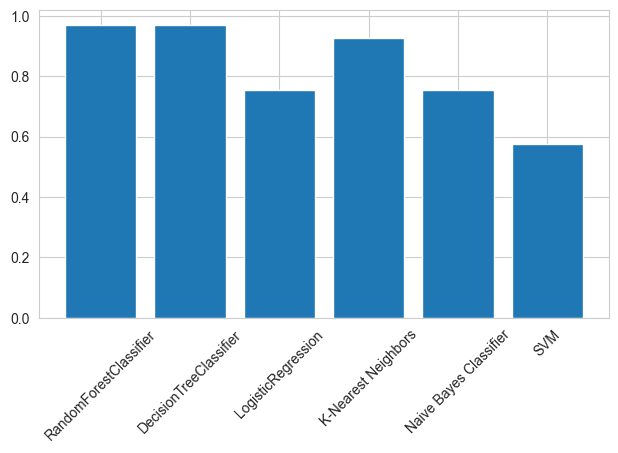

In [68]:
plt.figure(figsize=(25,4),num=10)
plt.subplot(131)
plt.xticks(rotation=45)
plt.bar(metrics_df_init.index,metrics_df_init['Accuracy'])

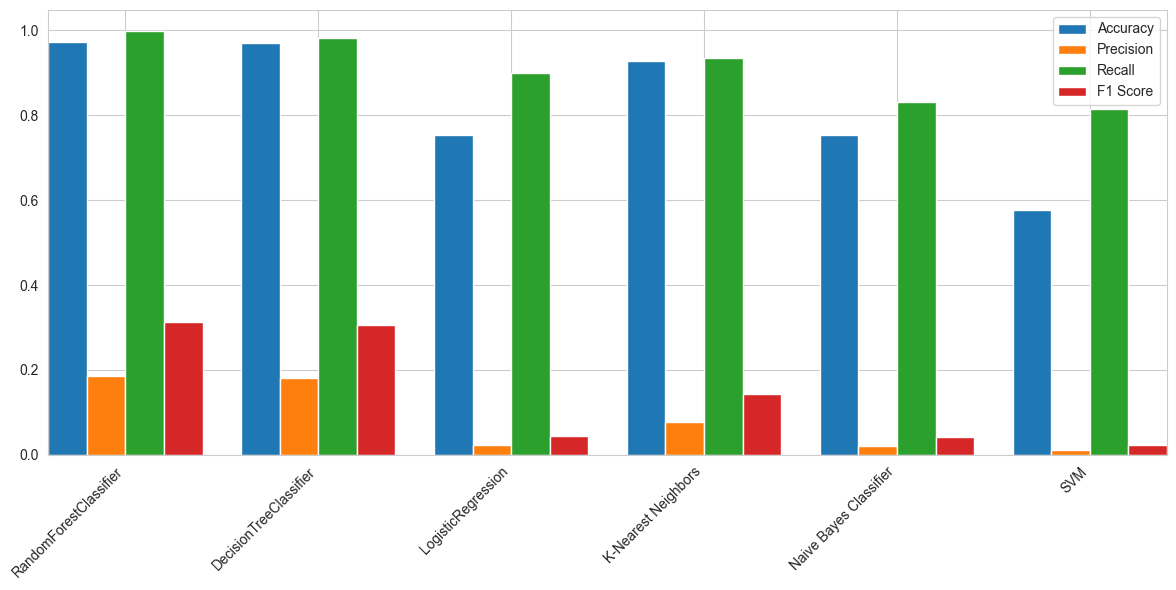

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_init.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_init.columns[:-3]):  
    values = metrics_df_init[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as an SVG file
plt.savefig('metrics_df_init.png', dpi=300, format='png')
plt.show()


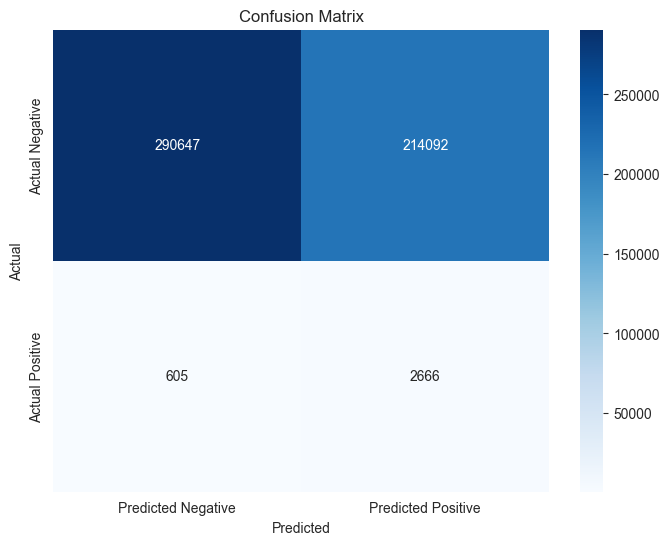

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix = metrics_df_init['Confusion Matrix'][5]


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Save the figure as an SVG file
plt.savefig('init_ConfusionMatrixSVM.png', dpi=300, format='png')
# Show the plot
plt.show()



# Show the false alarm count plot
plt.show()

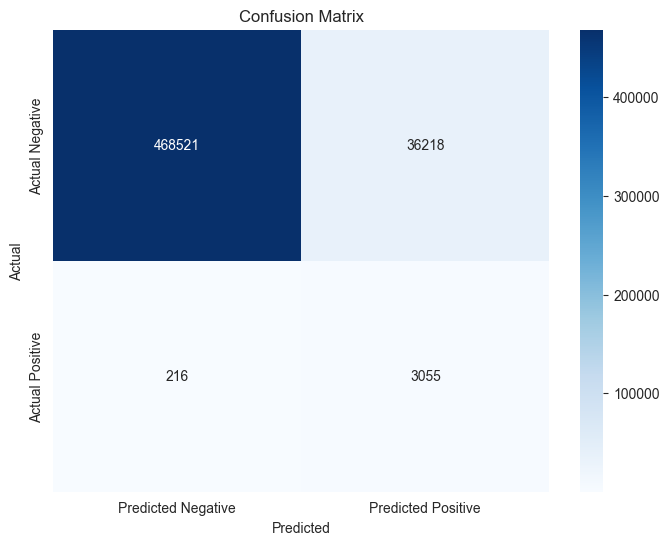

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix = metrics_df_init['Confusion Matrix'][3]


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Save the figure as an SVG file
plt.savefig('init_ConfusionMatrixKNN.png', dpi=300, format='png')
# Show the plot
plt.show()



# Show the false alarm count plot
plt.show()

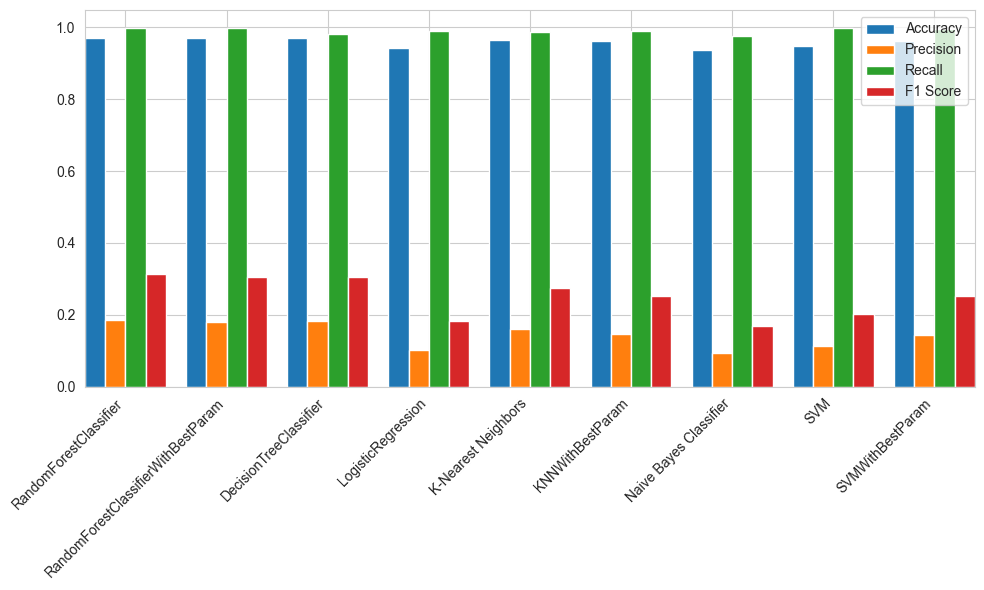

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_normalization.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_normalization.columns[:-1]):  
    values = metrics_df_normalization[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_normalization.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_normalization.svg', dpi=300, format='svg')
plt.show()


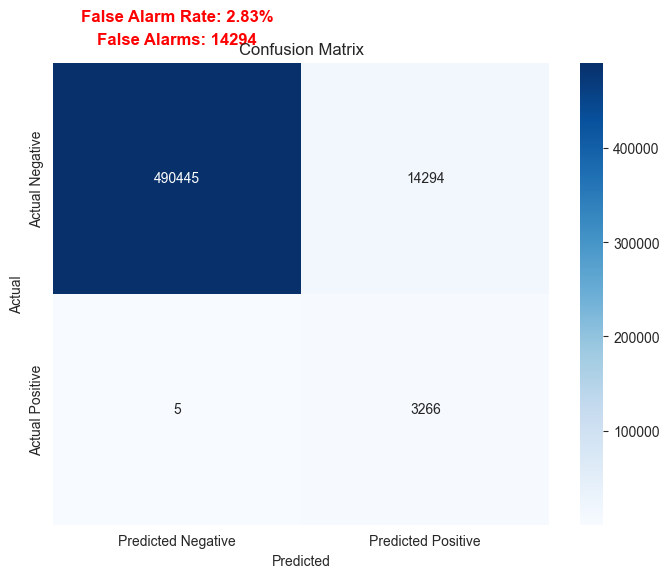

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix = metrics_df_normalization['Confusion Matrix'][0]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_normalizationRF.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_normalizationRF.svg', dpi=300, format='svg')
# Show the plot
plt.show()



# Show the false alarm count plot
plt.show()

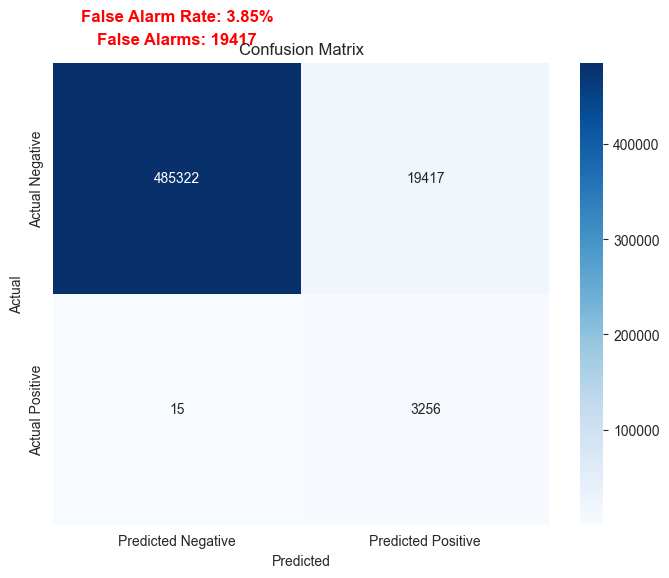

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix = metrics_df_normalization['Confusion Matrix'][8]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_normalizationSVMWITHPARAM.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_normalizationSVMWITHPARAM.svg', dpi=300, format='svg')
# Show the plot
plt.show()



# Show the false alarm count plot
plt.show()

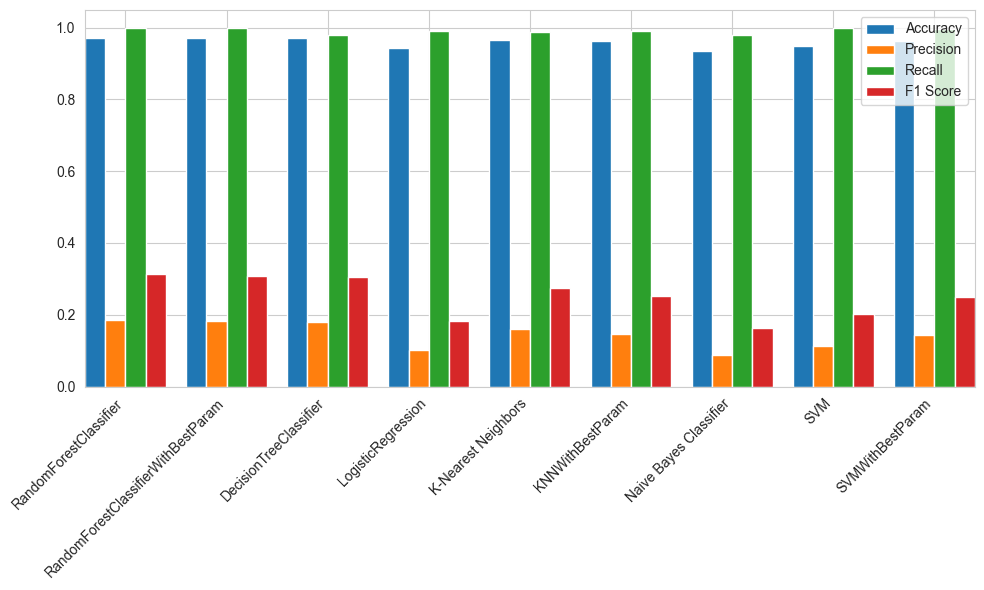

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_Columns_Corr.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_Corr.columns[:-1]):  
    values = metrics_df_Columns_Corr[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_Columns_Corr.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_Columns_Corr.svg', dpi=300, format='svg')
plt.show()


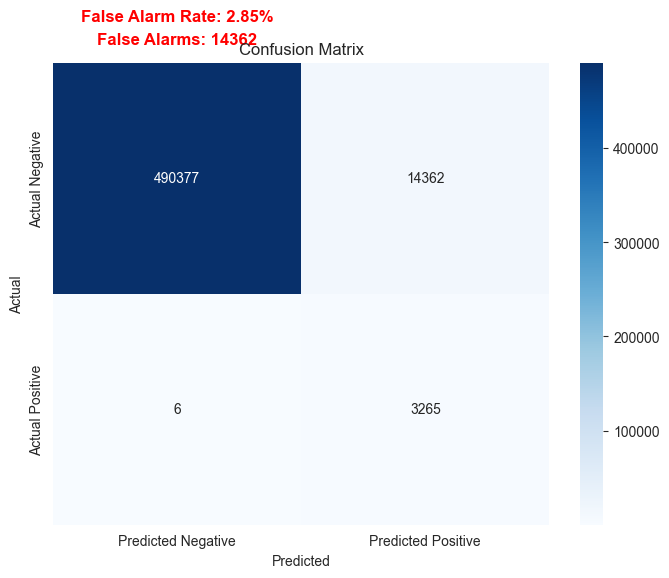

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix = metrics_df_Columns_Corr['Confusion Matrix'][0]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_Columns_CorrRF.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_Columns_CorrRF.svg', dpi=300, format='svg')
# Show the plot
plt.show()



# Show the false alarm count plot
plt.show()

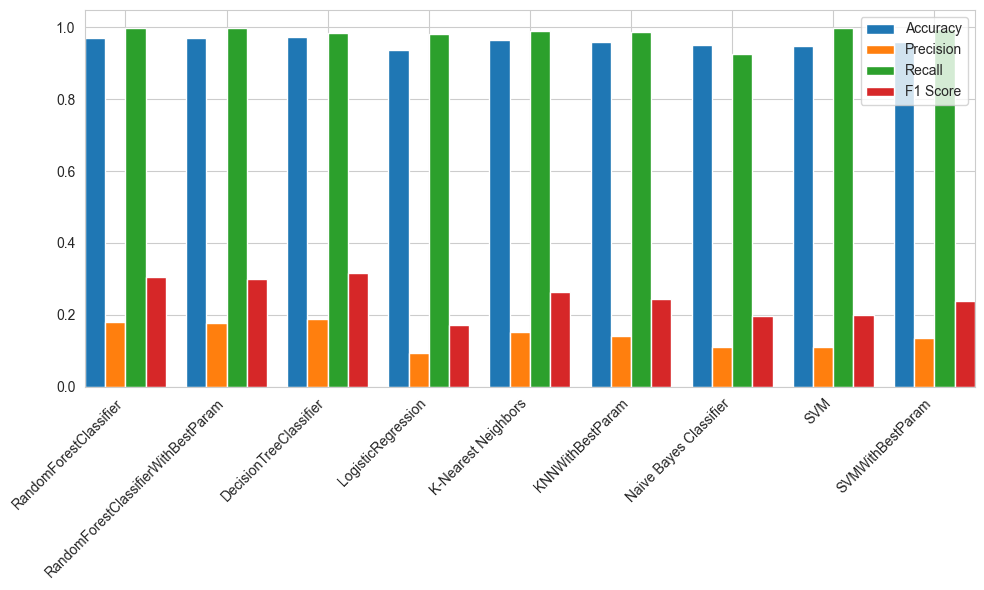

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_label_Corr.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_label_Corr.columns[:-1]):  
    values = metrics_df_label_Corr[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_label_Corr.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_label_Corr.svg', dpi=300, format='svg')
plt.show()


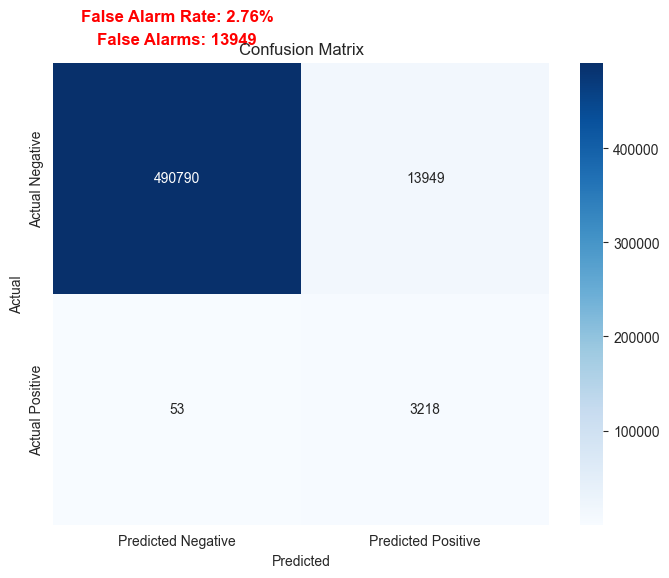

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =metrics_df_label_Corr['Confusion Matrix'][2]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_label_CorrDT.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_label_CorrDT.svg', dpi=300, format='svg')
# Show the plot
plt.show()

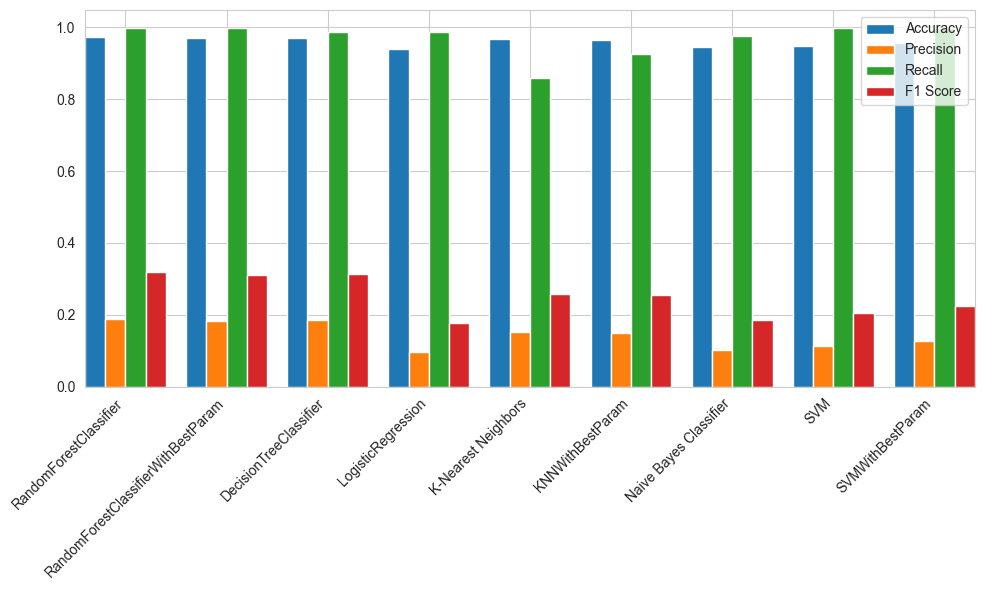

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_Rf_feature_selection.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Rf_feature_selection.columns[:-1]):  
    values = metrics_df_Rf_feature_selection[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_Rf_feature_selection.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_Rf_feature_selection.svg', dpi=300, format='svg')
plt.show()


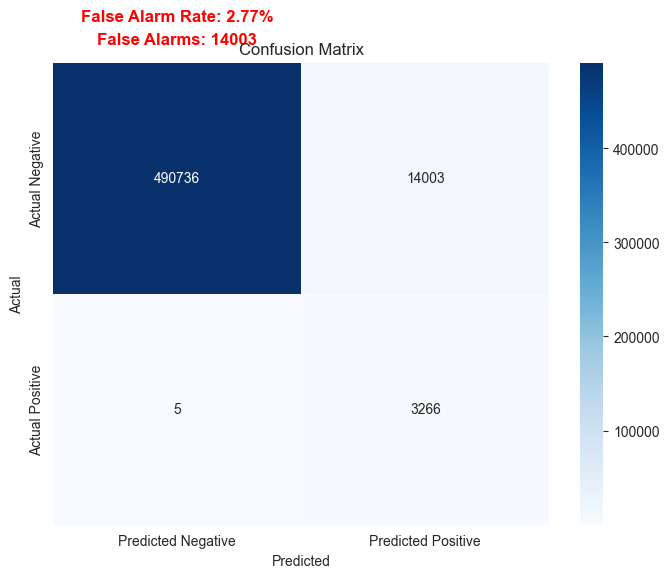

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =metrics_df_Rf_feature_selection['Confusion Matrix'][0]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_Rf_feature_selectionRF.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_Rf_feature_selectionRF.svg', dpi=300, format='svg')
# Show the plot
plt.show()

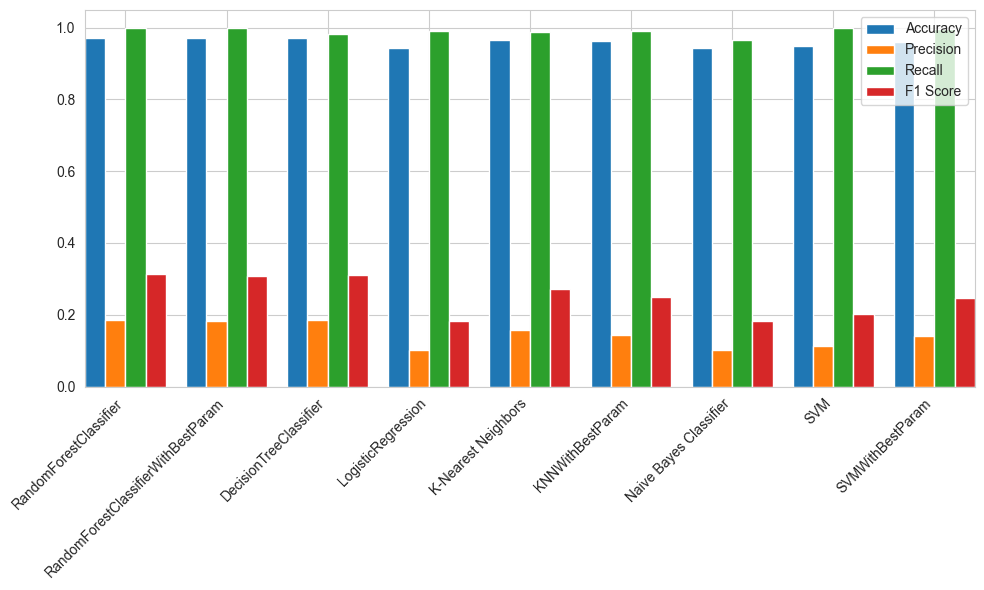

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_mutual_info_classif.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_mutual_info_classif.columns[:-1]):  
    values = metrics_df_mutual_info_classif[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_mutual_info_classif.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_mutual_info_classif.svg', dpi=300, format='svg')
plt.show()


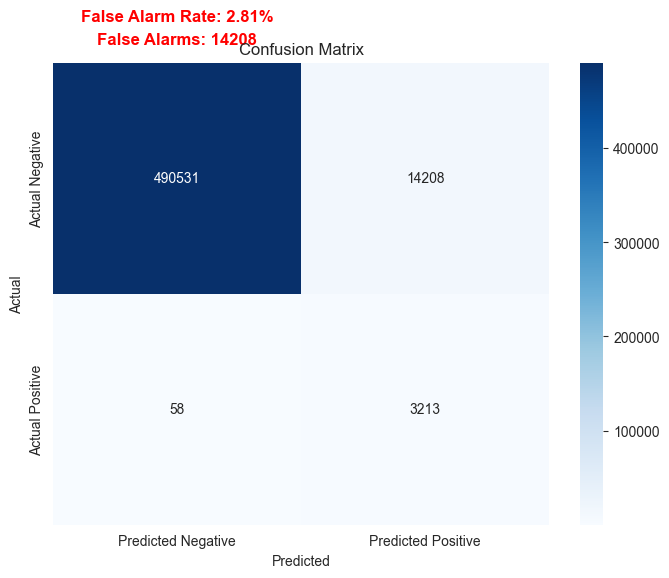

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =metrics_df_mutual_info_classif['Confusion Matrix'][2]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_mutual_info_classifDT.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_mutual_info_classifDT.svg', dpi=300, format='svg')
# Show the plot
plt.show()

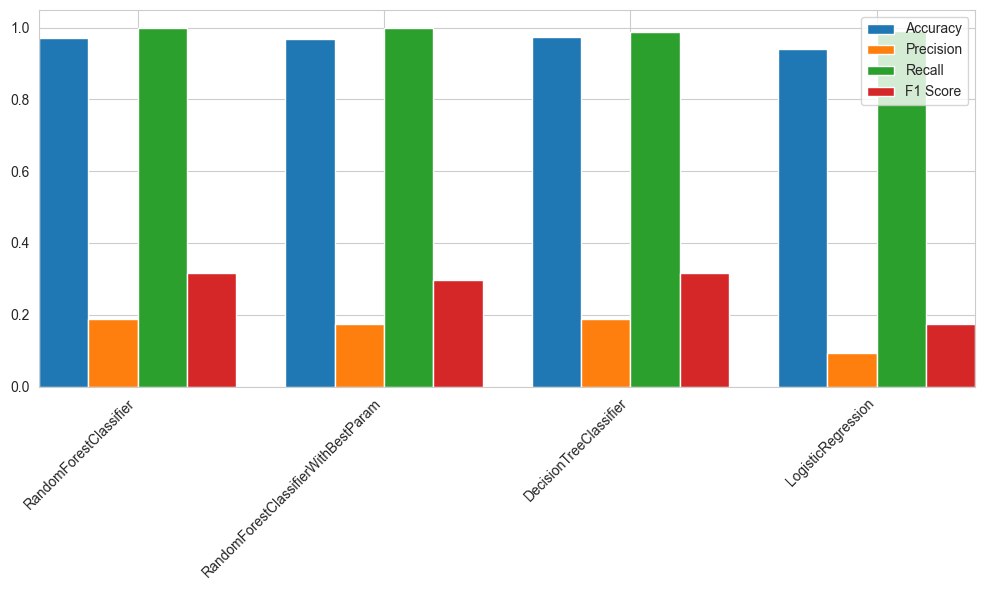

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_RFE.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_RFE.columns[:-1]):  
    values = metrics_df_RFE[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_RFE.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_RFE.svg', dpi=300, format='svg')
plt.show()


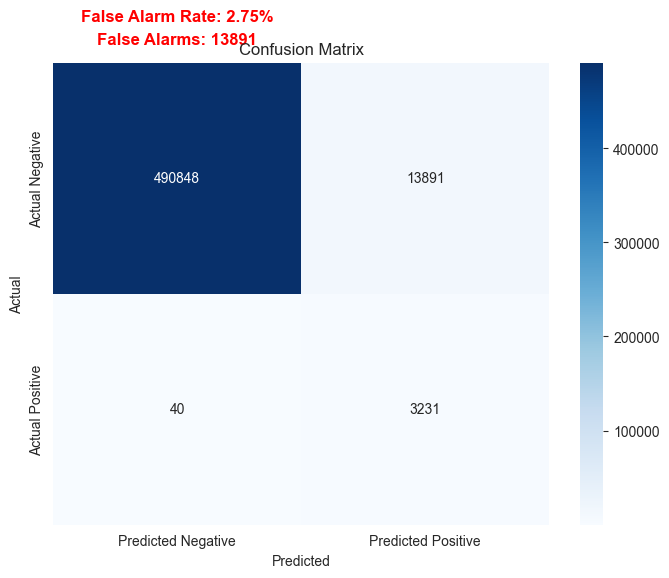

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =metrics_df_RFE['Confusion Matrix'][2]

# Extract the false positive value from the confusion matrix
false_alarms = confusion_matrix[0][1]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
# Calculate the false alarm rate
total_negatives = confusion_matrix.sum(axis=1)[0]
false_alarm_rate = false_alarms / total_negatives


# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add a text annotation for the false alarms and false alarm rate
plt.text(0.5, -0.1, f"False Alarms: {false_alarms}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
plt.text(0.5, -0.2, f"False Alarm Rate: {false_alarm_rate:.2%}", ha='center', va='center', fontsize=12, color='red', fontweight='bold')
# Save the figure as a PDF file
plt.savefig('metrics_df_RFEDT.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_RFEDT.svg', dpi=300, format='svg')
# Show the plot
plt.show()

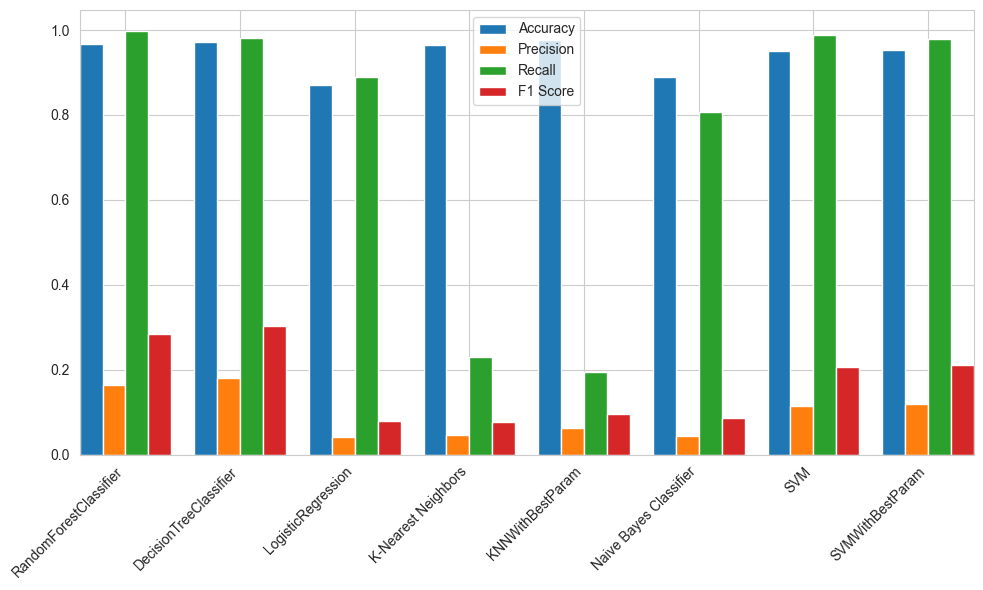

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_Chi2.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Chi2.columns[:-3]):  
    values = metrics_df_Chi2[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()



# Save the figure as an SVG file
plt.savefig('final_Chi2.png', dpi=300, format='png')
plt.show()


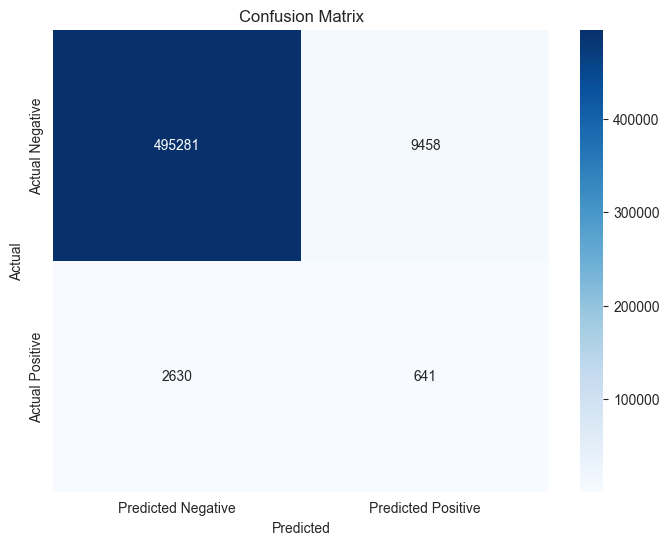

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =metrics_df_Chi2['Confusion Matrix'][4]


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('final_Chi2KNN.png', dpi=300, format='png')
# Show the plot
plt.show()

In [69]:
metrics_df_init.to_excel('metrics_df_init.xlsx')
metrics_df_normalization.to_excel('metrics_df_normalization.xlsx')
metrics_df_Columns_Corr.to_excel('metrics_df_Columns_Corr.xlsx')
metrics_df_label_Corr.to_excel('metrics_df_label_Corr.xlsx')
metrics_df_Rf_feature_selection.to_excel('metrics_df_Rf_feature_selection.xlsx')
metrics_df_mutual_info_classif.to_excel('metrics_df_mutual_info_classif.xlsx')
metrics_df_RFE.to_excel('metrics_df_RFE.xlsx')
metrics_df_Chi2.to_excel('metrics_df_Chi2.xlsx')

In [68]:
import pandas as pd




chi2 = metrics_df_Chi2.iloc[:,0:4]-metrics_df_init.iloc[:,0:4]

Rf_feature_selection = metrics_df_Rf_feature_selection.iloc[:,0:4]-metrics_df_init.iloc[:,0:4]
mutual_info_classif = metrics_df_mutual_info_classif.iloc[:,0:4] - metrics_df_init.iloc[:,0:4]
RFE= metrics_df_RFE.iloc[:,0:4]- metrics_df_init.iloc[:,0:4]

print(chi2)

                        Accuracy  Precision    Recall  F1 Score
DecisionTreeClassifier -0.000278  -0.001508 -0.000611 -0.002181
K-Nearest Neighbors     0.036548  -0.031193 -0.704677 -0.066165
KNNWithBestParam             NaN        NaN       NaN       NaN
LogisticRegression      0.115216   0.019150 -0.010394  0.035625
Naive Bayes Classifier  0.136125   0.024065 -0.024457  0.044359
RandomForestClassifier -0.004370  -0.021044 -0.000917 -0.030468
SVM                     0.373833   0.103271  0.173647  0.182716
SVMWithBestParam             NaN        NaN       NaN       NaN


In [72]:

new_row = pd.Series(metrics_df_init.loc['K-Nearest Neighbors'].values, index=metrics_df_init.columns)

# Use loc to insert the new row after the "K-Nearest Neighbors" row
df = pd.concat([metrics_df_init.loc[:'K-Nearest Neighbors'], pd.Series(new_row, name='KNNWithBestParam'), metrics_df_init.loc['K-Nearest Neighbors':]]).reset_index(drop=True)
print(df)

# Create the new row dataframe
new_row_df = pd.DataFrame(metrics_df_init.iloc['K-Nearest Neighbors'], index=['KNNWithBestParam'])

# Insert the new row at the third position using loc
df = metrics_df_init.iloc[:2].append(new_row_df).append(metrics_df_init.iloc[2:]).reset_index(drop=True)

# Print the updated dataframe
print(df)

    Accuracy  Precision    Recall  F1 Score  False Alarm  False Alarm Rate   
0   0.971914   0.186284  0.998166  0.313972      14262.0          0.028256  \
1   0.971398   0.181571  0.981351  0.306444      14469.0          0.028666   
2   0.754253   0.023083  0.899419  0.045010     124513.0          0.246688   
3   0.928281   0.077789  0.933965  0.143616      36218.0          0.071756   
4        NaN        NaN       NaN       NaN          NaN               NaN   
5        NaN        NaN       NaN       NaN          NaN               NaN   
6        NaN        NaN       NaN       NaN          NaN               NaN   
7        NaN        NaN       NaN       NaN          NaN               NaN   
8        NaN        NaN       NaN       NaN          NaN               NaN   
9        NaN        NaN       NaN       NaN          NaN               NaN   
10       NaN        NaN       NaN       NaN          NaN               NaN   
11  0.928281   0.077789  0.933965  0.143616      36218.0        

TypeError: Cannot index by location index with a non-integer key

In [98]:
metrics = pd.read_excel('metrics_df_init.xlsx')
print(metrics)

               Unnamed: 0  Accuracy  Precision    Recall  F1 Score   
0  RandomForestClassifier  0.971914   0.186284  0.998166  0.313972  \
1  DecisionTreeClassifier  0.971398   0.181571  0.981351  0.306444   
2      LogisticRegression  0.754253   0.023083  0.899419  0.045010   
3     K-Nearest Neighbors  0.928281   0.077789  0.933965  0.143616   
4  Naive Bayes Classifier  0.753458   0.021325  0.830633  0.041582   
5                     SVM  0.577376   0.012299  0.815041  0.024233   

                      Confusion Matrix  
0  [[490477  14262]\n [     6   3265]]  
1  [[490270  14469]\n [    61   3210]]  
2  [[380226 124513]\n [   329   2942]]  
3  [[468521  36218]\n [   216   3055]]  
4  [[380047 124692]\n [   554   2717]]  
5  [[290647 214092]\n [   605   2666]]  


In [96]:
print(metrics['Confusion Matrix'][0])

[[490477  14262]
 [     6   3265]]


In [90]:

# Write each dataframe to a different sheet in the same Excel file
metrics_df_init.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=0, startcol=0)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=0, startcol=8)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=10, startcol=0)
metrics_df_Columns_Corr.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=10, startcol=8)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=20, startcol=0)
metrics_df_label_Corr.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=20, startcol=8)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=30, startcol=0)
metrics_df_Rf_feature_selection.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=30, startcol=8)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=40, startcol=0)
metrics_df_mutual_info_classif.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=40, startcol=8)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=50, startcol=0)
metrics_df_RFE.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=50, startcol=8)
metrics_df_normalization.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=57, startcol=0)
metrics_df_Chi2.iloc[:,0:4].to_excel('metrics1.xlsx', sheet_name='UNSW_NB15', startrow=57, startcol=8)


In [85]:
print(metrics_df_Rf_feature_selection['Accuracy'][6])
 'KNN':[],
    'KNN with Param':[],
    'Naive Bayes':[],
    ''

0.9498238223657015


<Figure size 1600x1000 with 0 Axes>

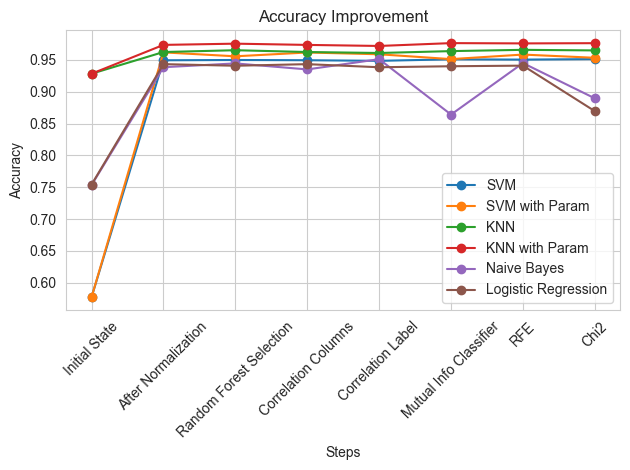

In [160]:
AccuracyImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Random Forest Selection','Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  'SVM': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][6],metrics_df_Rf_feature_selection['Accuracy'][6]
          ,metrics_df_Columns_Corr['Accuracy'][6],
          metrics_df_label_Corr['Accuracy'][6],
          metrics_df_mutual_info_classif['Accuracy'][6], metrics_df_RFE['Accuracy'][6], metrics_df_Chi2['Accuracy'][6]],
  'SVM with Param': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][7],
                     metrics_df_Rf_feature_selection['Accuracy'][7],metrics_df_Columns_Corr['Accuracy'][7],
                     metrics_df_label_Corr['Accuracy'][7], metrics_df_mutual_info_classif['Accuracy'][7],
                     metrics_df_RFE['Accuracy'][7], metrics_df_Chi2['Accuracy'][7]],
    'KNN':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][3],
                     metrics_df_Rf_feature_selection['Accuracy'][3],metrics_df_Columns_Corr['Accuracy'][3],
                     metrics_df_label_Corr['Accuracy'][3], metrics_df_mutual_info_classif['Accuracy'][3],
                     metrics_df_RFE['Accuracy'][3], metrics_df_Chi2['Accuracy'][3]],
    'KNN with Param':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][4],
                     metrics_df_Rf_feature_selection['Accuracy'][4],metrics_df_Columns_Corr['Accuracy'][4],
                     metrics_df_label_Corr['Accuracy'][4], metrics_df_mutual_info_classif['Accuracy'][4],
                     metrics_df_RFE['Accuracy'][4], metrics_df_Chi2['Accuracy'][4]],
    'Naive Bayes':[metrics_df_init['Accuracy'][4], metrics_df_normalization['Accuracy'][5],
                     metrics_df_Rf_feature_selection['Accuracy'][5],metrics_df_Columns_Corr['Accuracy'][5],
                     metrics_df_label_Corr['Accuracy'][5], metrics_df_mutual_info_classif['Accuracy'][5],
                     metrics_df_RFE['Accuracy'][5], metrics_df_Chi2['Accuracy'][5]],
    'Logistic Regression':[metrics_df_init['Accuracy'][2], metrics_df_normalization['Accuracy'][2],
                     metrics_df_Rf_feature_selection['Accuracy'][2],metrics_df_Columns_Corr['Accuracy'][2],
                     metrics_df_label_Corr['Accuracy'][2], metrics_df_mutual_info_classif['Accuracy'][2],
                     metrics_df_RFE['Accuracy'][2], metrics_df_Chi2['Accuracy'][2]]
}
AccuracyImprovement = pd.DataFrame(AccuracyImprovement)

# Set the 'Step' column as the index for easier plotting
AccuracyImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AccuracyImprovement.loc[['Initial State', 'After Normalization','Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy Improvement')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'])
plt.subplots_adjust(hspace=1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('accuracy_improvement_plot.png', format='png')

# Show the plot
plt.show()

In [161]:
AccuracyImprovement.to_excel('AccuracyImprovement.xlsx')

<Figure size 1600x1000 with 0 Axes>

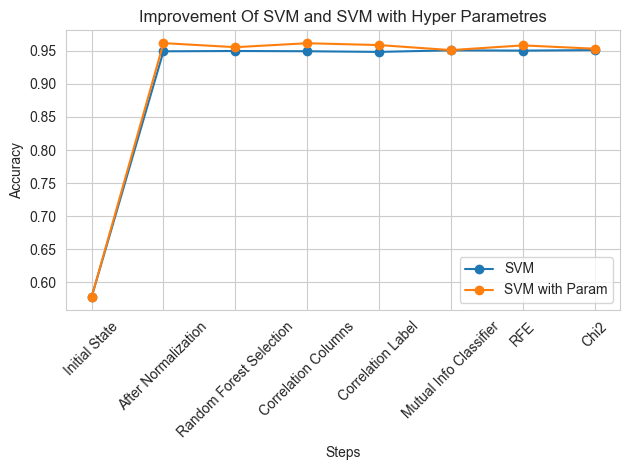

In [162]:
AccuracySvmImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  'SVM': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][6],metrics_df_Rf_feature_selection['Accuracy'][6],metrics_df_Columns_Corr['Accuracy'][6],
          metrics_df_label_Corr['Accuracy'][6],
          metrics_df_mutual_info_classif['Accuracy'][6], metrics_df_RFE['Accuracy'][6], metrics_df_Chi2['Accuracy'][6]],
  'SVM with Param': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][7],
                     metrics_df_Rf_feature_selection['Accuracy'][7],metrics_df_Columns_Corr['Accuracy'][7],
                     metrics_df_label_Corr['Accuracy'][7], metrics_df_mutual_info_classif['Accuracy'][7],
                     metrics_df_RFE['Accuracy'][7], metrics_df_Chi2['Accuracy'][7]],
    
}
AccuracySvmImprovement = pd.DataFrame(AccuracySvmImprovement)

# Set the 'Step' column as the index for easier plotting
AccuracySvmImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AccuracySvmImprovement.loc[['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Improvement Of SVM and SVM with Hyper Parametres')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param'])
plt.subplots_adjust(hspace=1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('accuracy_svm_improvement_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

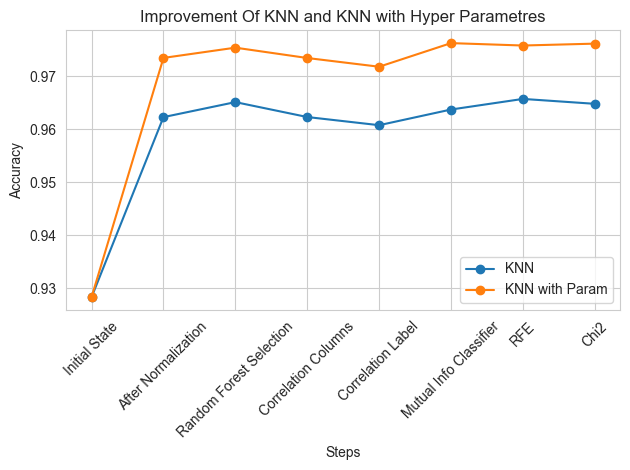

In [159]:
AccuracyKnnImprovement = {
  'Step': ['Initial State', 'After Normalization','Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  
    'KNN':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][3],
                     metrics_df_Rf_feature_selection['Accuracy'][3],metrics_df_Columns_Corr['Accuracy'][3],
                     metrics_df_label_Corr['Accuracy'][3], metrics_df_mutual_info_classif['Accuracy'][3],
                     metrics_df_RFE['Accuracy'][3], metrics_df_Chi2['Accuracy'][3]],
    'KNN with Param':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][4],
                     metrics_df_Rf_feature_selection['Accuracy'][4],metrics_df_Columns_Corr['Accuracy'][4],
                     metrics_df_label_Corr['Accuracy'][4], metrics_df_mutual_info_classif['Accuracy'][4],
                     metrics_df_RFE['Accuracy'][4], metrics_df_Chi2['Accuracy'][4]],
   
}
AccuracyKnnImprovement = pd.DataFrame(AccuracyKnnImprovement)

# Set the 'Step' column as the index for easier plotting
AccuracyKnnImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AccuracyKnnImprovement.loc[['Initial State', 'After Normalization','Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Improvement Of KNN and KNN with Hyper Parametres')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['KNN','KNN with Param'])
plt.subplots_adjust(hspace=1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('accuracy_knn_improvement_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

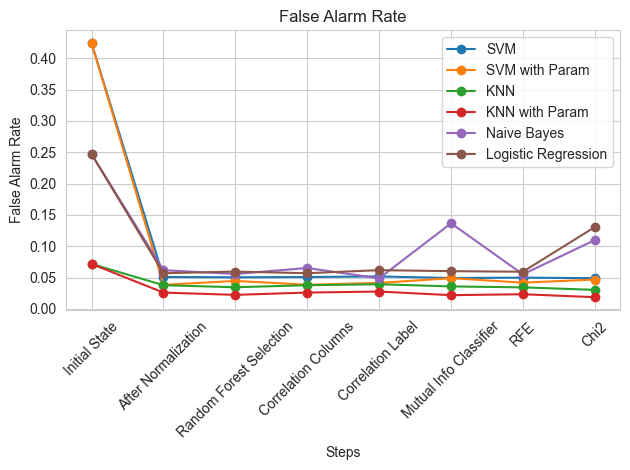

In [163]:
AlarmImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  'SVM': [metrics_df_init['False Alarm Rate'][5], metrics_df_normalization['False Alarm Rate'][6],metrics_df_Rf_feature_selection['False Alarm Rate'][6],
          metrics_df_Columns_Corr['False Alarm Rate'][6],
          metrics_df_label_Corr['False Alarm Rate'][6],
          metrics_df_mutual_info_classif['False Alarm Rate'][6], metrics_df_RFE['False Alarm Rate'][6], 
          metrics_df_Chi2['False Alarm Rate'][6]],
  'SVM with Param': [metrics_df_init['False Alarm Rate'][5], metrics_df_normalization['False Alarm Rate'][7],
                     metrics_df_Rf_feature_selection['False Alarm Rate'][7],metrics_df_Columns_Corr['False Alarm Rate'][7],
                     metrics_df_label_Corr['False Alarm Rate'][7], metrics_df_mutual_info_classif['False Alarm Rate'][7],
                     metrics_df_RFE['False Alarm Rate'][7], metrics_df_Chi2['False Alarm Rate'][7]],
    'KNN':[metrics_df_init['False Alarm Rate'][3], metrics_df_normalization['False Alarm Rate'][3],
                     metrics_df_Rf_feature_selection['False Alarm Rate'][3],metrics_df_Columns_Corr['False Alarm Rate'][3],
                     metrics_df_label_Corr['False Alarm Rate'][3], metrics_df_mutual_info_classif['False Alarm Rate'][3],
                     metrics_df_RFE['False Alarm Rate'][3], metrics_df_Chi2['False Alarm Rate'][3]],
    'KNN with Param':[metrics_df_init['False Alarm Rate'][3], metrics_df_normalization['False Alarm Rate'][4],
                     metrics_df_Rf_feature_selection['False Alarm Rate'][4],metrics_df_Columns_Corr['False Alarm Rate'][4],
                     metrics_df_label_Corr['False Alarm Rate'][4], metrics_df_mutual_info_classif['False Alarm Rate'][4],
                     metrics_df_RFE['False Alarm Rate'][4], metrics_df_Chi2['False Alarm Rate'][4]],
    'Naive Bayes':[metrics_df_init['False Alarm Rate'][4], metrics_df_normalization['False Alarm Rate'][5],
                     metrics_df_Rf_feature_selection['False Alarm Rate'][5],metrics_df_Columns_Corr['False Alarm Rate'][5],
                     metrics_df_label_Corr['False Alarm Rate'][5], metrics_df_mutual_info_classif['False Alarm Rate'][5],
                     metrics_df_RFE['False Alarm Rate'][5], metrics_df_Chi2['False Alarm Rate'][5]],
    'Logistic Regression':[metrics_df_init['False Alarm Rate'][2], metrics_df_normalization['False Alarm Rate'][2],
                     metrics_df_Rf_feature_selection['False Alarm Rate'][2],metrics_df_Columns_Corr['False Alarm Rate'][2],
                     metrics_df_label_Corr['False Alarm Rate'][2], metrics_df_mutual_info_classif['False Alarm Rate'][2],
                     metrics_df_RFE['False Alarm Rate'][2], metrics_df_Chi2['False Alarm Rate'][2]]
}
AlarmImprovement = pd.DataFrame(AlarmImprovement)

# Set the 'Step' column as the index for easier plotting
AlarmImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AlarmImprovement.loc[['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('False Alarm Rate')
plt.title('False Alarm Rate')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'])
plt.subplots_adjust(hspace=1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('FalseAlarm_plot.png', format='png')

# Show the plot
plt.show()

In [164]:
AlarmImprovement.to_excel('AlarmImprovement.xlsx')

<Figure size 1600x1000 with 0 Axes>

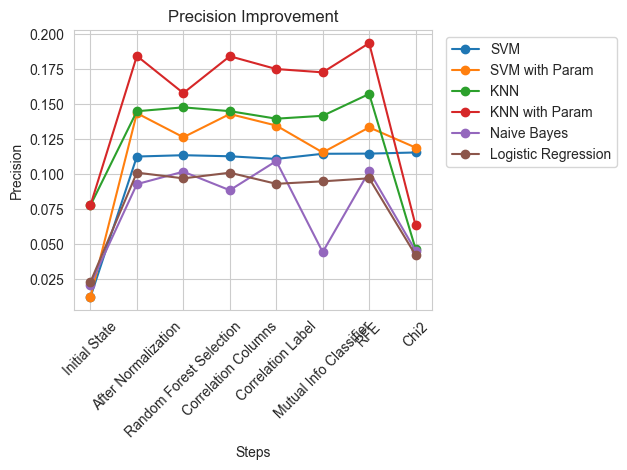

In [165]:
PrecisionImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  'SVM': [metrics_df_init['Precision'][5], metrics_df_normalization['Precision'][6],metrics_df_Rf_feature_selection['Precision'][6],metrics_df_Columns_Corr['Precision'][6],
          metrics_df_label_Corr['Precision'][6],
          metrics_df_mutual_info_classif['Precision'][6], metrics_df_RFE['Precision'][6], metrics_df_Chi2['Precision'][6]],
  'SVM with Param': [metrics_df_init['Precision'][5], metrics_df_normalization['Precision'][7],
                     metrics_df_Rf_feature_selection['Precision'][7],metrics_df_Columns_Corr['Precision'][7],
                     metrics_df_label_Corr['Precision'][7], metrics_df_mutual_info_classif['Precision'][7],
                     metrics_df_RFE['Precision'][7], metrics_df_Chi2['Precision'][7]],
    'KNN':[metrics_df_init['Precision'][3], metrics_df_normalization['Precision'][3],
                     metrics_df_Rf_feature_selection['Precision'][3],metrics_df_Columns_Corr['Precision'][3],
                     metrics_df_label_Corr['Precision'][3], metrics_df_mutual_info_classif['Precision'][3],
                     metrics_df_RFE['Precision'][3], metrics_df_Chi2['Precision'][3]],
    'KNN with Param':[metrics_df_init['Precision'][3], metrics_df_normalization['Precision'][4],
                     metrics_df_Rf_feature_selection['Precision'][4],metrics_df_Columns_Corr['Precision'][4],
                     metrics_df_label_Corr['Precision'][4], metrics_df_mutual_info_classif['Precision'][4],
                     metrics_df_RFE['Precision'][4], metrics_df_Chi2['Precision'][4]],
    'Naive Bayes':[metrics_df_init['Precision'][4], metrics_df_normalization['Precision'][5],
                     metrics_df_Rf_feature_selection['Precision'][5],metrics_df_Columns_Corr['Precision'][5],
                     metrics_df_label_Corr['Precision'][5], metrics_df_mutual_info_classif['Precision'][5],
                     metrics_df_RFE['Precision'][5], metrics_df_Chi2['Precision'][5]],
    'Logistic Regression':[metrics_df_init['Precision'][2], metrics_df_normalization['Precision'][2],
                     metrics_df_Rf_feature_selection['Precision'][2],metrics_df_Columns_Corr['Precision'][2],
                     metrics_df_label_Corr['Precision'][2], metrics_df_mutual_info_classif['Precision'][2],
                     metrics_df_RFE['Precision'][2], metrics_df_Chi2['Precision'][2]]
}
PrecisionImprovement = pd.DataFrame(PrecisionImprovement)

# Set the 'Step' column as the index for easier plotting
PrecisionImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
PrecisionImprovement.loc[['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision Improvement')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'], loc='upper left', bbox_to_anchor=(1.02, 1.0))

plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('precision_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

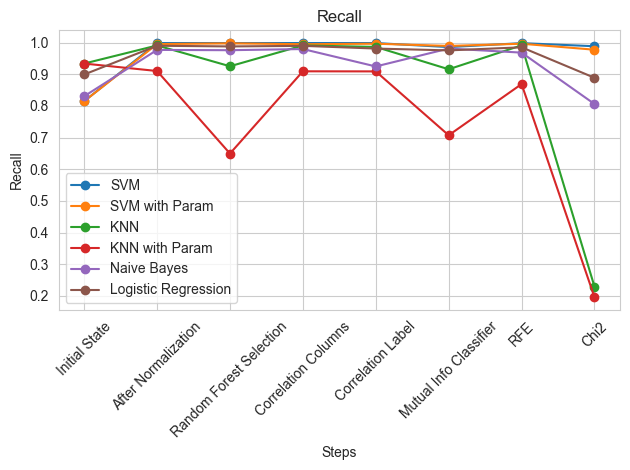

In [166]:
RecallImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  'SVM': [metrics_df_init['Recall'][5], metrics_df_normalization['Recall'][6],metrics_df_Rf_feature_selection['Recall'][6],metrics_df_Columns_Corr['Recall'][6],
          metrics_df_label_Corr['Recall'][6],
          metrics_df_mutual_info_classif['Recall'][6], metrics_df_RFE['Recall'][6], metrics_df_Chi2['Recall'][6]],
  'SVM with Param': [metrics_df_init['Recall'][5], metrics_df_normalization['Recall'][7],
                     metrics_df_Rf_feature_selection['Recall'][7],metrics_df_Columns_Corr['Recall'][7],
                     metrics_df_label_Corr['Recall'][7], metrics_df_mutual_info_classif['Recall'][7],
                     metrics_df_RFE['Recall'][7], metrics_df_Chi2['Recall'][7]],
    'KNN':[metrics_df_init['Recall'][3], metrics_df_normalization['Recall'][3],
                     metrics_df_Rf_feature_selection['Recall'][3],metrics_df_Columns_Corr['Recall'][3],
                     metrics_df_label_Corr['Recall'][3], metrics_df_mutual_info_classif['Recall'][3],
                     metrics_df_RFE['Recall'][3], metrics_df_Chi2['Recall'][3]],
    'KNN with Param':[metrics_df_init['Recall'][3], metrics_df_normalization['Recall'][4],
                     metrics_df_Rf_feature_selection['Recall'][4],metrics_df_Columns_Corr['Recall'][4],
                     metrics_df_label_Corr['Recall'][4], metrics_df_mutual_info_classif['Recall'][4],
                     metrics_df_RFE['Recall'][4], metrics_df_Chi2['Recall'][4]],
    'Naive Bayes':[metrics_df_init['Recall'][4], metrics_df_normalization['Recall'][5],
                     metrics_df_Rf_feature_selection['Recall'][5],metrics_df_Columns_Corr['Recall'][5],
                     metrics_df_label_Corr['Recall'][5], metrics_df_mutual_info_classif['Recall'][5],
                     metrics_df_RFE['Recall'][5], metrics_df_Chi2['Recall'][5]],
    'Logistic Regression':[metrics_df_init['Recall'][2], metrics_df_normalization['Recall'][2],
                     metrics_df_Rf_feature_selection['Recall'][2],metrics_df_Columns_Corr['Recall'][2],
                     metrics_df_label_Corr['Recall'][2], metrics_df_mutual_info_classif['Recall'][2],
                     metrics_df_RFE['Recall'][2], metrics_df_Chi2['Recall'][2]]
}
RecallImprovement = pd.DataFrame(RecallImprovement)

# Set the 'Step' column as the index for easier plotting
RecallImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
RecallImprovement.loc[['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label',  'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'])
plt.subplots_adjust(hspace=1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('Recall_improvement_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

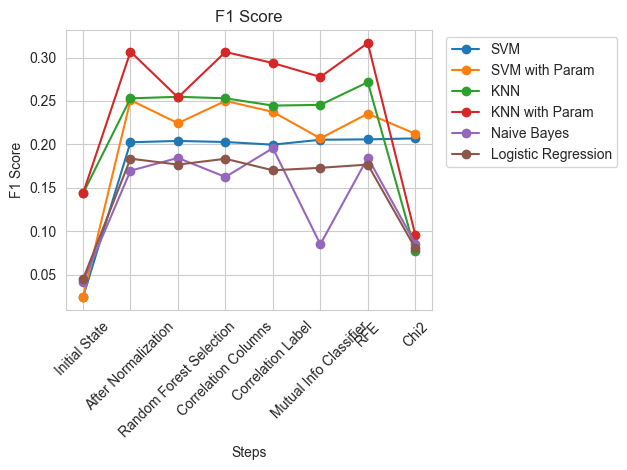

In [167]:
F1ScoreImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2'],
  'SVM': [metrics_df_init['F1 Score'][5], metrics_df_normalization['F1 Score'][6],metrics_df_Rf_feature_selection['F1 Score'][6],metrics_df_Columns_Corr['F1 Score'][6],
          metrics_df_label_Corr['F1 Score'][6],
          metrics_df_mutual_info_classif['F1 Score'][6], metrics_df_RFE['F1 Score'][6], metrics_df_Chi2['F1 Score'][6]],
  'SVM with Param': [metrics_df_init['F1 Score'][5], metrics_df_normalization['F1 Score'][7],
                     metrics_df_Rf_feature_selection['F1 Score'][7],metrics_df_Columns_Corr['F1 Score'][7],
                     metrics_df_label_Corr['F1 Score'][7], metrics_df_mutual_info_classif['F1 Score'][7],
                     metrics_df_RFE['F1 Score'][7], metrics_df_Chi2['F1 Score'][7]],
    'KNN':[metrics_df_init['F1 Score'][3], metrics_df_normalization['F1 Score'][3],
                     metrics_df_Rf_feature_selection['F1 Score'][3],metrics_df_Columns_Corr['F1 Score'][3],
                     metrics_df_label_Corr['F1 Score'][3], metrics_df_mutual_info_classif['F1 Score'][3],
                     metrics_df_RFE['F1 Score'][3], metrics_df_Chi2['F1 Score'][3]],
    'KNN with Param':[metrics_df_init['F1 Score'][3], metrics_df_normalization['F1 Score'][4],
                     metrics_df_Rf_feature_selection['F1 Score'][4],metrics_df_Columns_Corr['F1 Score'][4],
                     metrics_df_label_Corr['F1 Score'][4], metrics_df_mutual_info_classif['F1 Score'][4],
                     metrics_df_RFE['F1 Score'][4], metrics_df_Chi2['F1 Score'][4]],
    'Naive Bayes':[metrics_df_init['F1 Score'][4], metrics_df_normalization['F1 Score'][5],
                     metrics_df_Rf_feature_selection['F1 Score'][5],metrics_df_Columns_Corr['F1 Score'][5],
                     metrics_df_label_Corr['F1 Score'][5], metrics_df_mutual_info_classif['F1 Score'][5],
                     metrics_df_RFE['F1 Score'][5], metrics_df_Chi2['F1 Score'][5]],
    'Logistic Regression':[metrics_df_init['F1 Score'][2], metrics_df_normalization['F1 Score'][2],
                     metrics_df_Rf_feature_selection['F1 Score'][2],metrics_df_Columns_Corr['F1 Score'][2],
                     metrics_df_label_Corr['F1 Score'][2], metrics_df_mutual_info_classif['F1 Score'][2],
                     metrics_df_RFE['F1 Score'][2], metrics_df_Chi2['F1 Score'][2]]
}
F1ScoreImprovement = pd.DataFrame(F1ScoreImprovement)

# Set the 'Step' column as the index for easier plotting
F1ScoreImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
F1ScoreImprovement.loc[['Initial State', 'After Normalization', 'Random Forest Selection', 'Correlation Columns', 'Correlation Label', 'Mutual Info Classifier', 'RFE', 'Chi2']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'], loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.subplots_adjust(hspace=1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('F1Score_improvement_plot.png', format='png')

# Show the plot
plt.show()

In [156]:
KNNS = metrics_df_mutual_info_classif.loc['KNNWithBestParam', metrics_df_mutual_info_classif.columns[:-1]] - metrics_df_init.loc['K-Nearest Neighbors', metrics_df_init.columns[:-1]]
SVMS = metrics_df_normalization.loc['SVMWithBestParam', metrics_df_normalization.columns[:-1]] - metrics_df_init.loc['SVM', metrics_df_init.columns[:-1]]
NBS = metrics_df_label_Corr.loc['Naive Bayes Classifier', metrics_df_label_Corr.columns[:-1]] - metrics_df_init.loc['Naive Bayes Classifier', metrics_df_init.columns[:-1]]
LRS = metrics_df_normalization.loc['LogisticRegression', metrics_df_normalization.columns[:-1]] - metrics_df_init.loc['LogisticRegression', metrics_df_init.columns[:-1]]
data = {'KNN': KNNS, 'SVM': SVMS,'Naive Bayes':NBS,'Logistic Regression':LRS}
dfI = pd.DataFrame(data, index=KNNS.index)

print(dfI)
dfI.to_excel('Improvement.xlsx')

                       KNN       SVM Naive Bayes Logistic Regression
Accuracy          0.048023  0.384372    0.197606            0.189053
Precision         0.094962  0.131308    0.088122            0.078111
Recall           -0.226536  0.180373    0.094161            0.090798
F1 Score          0.134075  0.226769    0.154147            0.138612
False Alarm         -25137   -194675     -100078              -95744
False Alarm Rate -0.049802 -0.385694   -0.198277            -0.18969


In [158]:
KNNS = metrics_df_mutual_info_classif.loc['KNNWithBestParam', metrics_df_mutual_info_classif.columns[:-1]] - metrics_df_init.loc['K-Nearest Neighbors', metrics_df_init.columns[:-1]]
SVMS = metrics_df_Columns_Corr.loc['SVMWithBestParam', metrics_df_Columns_Corr.columns[:-1]] - metrics_df_init.loc['SVM', metrics_df_init.columns[:-1]]
NBS = metrics_df_label_Corr.loc['Naive Bayes Classifier', metrics_df_label_Corr.columns[:-1]] - metrics_df_init.loc['Naive Bayes Classifier', metrics_df_init.columns[:-1]]
LRs = metrics_df_Columns_Corr.loc['LogisticRegression', metrics_df_Columns_Corr.columns[:-1]] - metrics_df_init.loc['LogisticRegression', metrics_df_init.columns[:-1]]

data = {'KNN': KNNS, 'SVM': SVMS,'Naive Bayes':NBS,'Logistic Regression':LRS}
df = pd.DataFrame(data, index=KNNS.index)

print(df)
df.to_excel('Improvement1.xlsx')

                       KNN       SVM Naive Bayes Logistic Regression
Accuracy          0.048023  0.384197    0.197606            0.189053
Precision         0.094962  0.130715    0.088122            0.078111
Recall           -0.226536  0.180067    0.094161            0.090798
F1 Score          0.134075  0.225853    0.154147            0.138612
False Alarm         -25137   -194587     -100078              -95744
False Alarm Rate -0.049802  -0.38552   -0.198277            -0.18969


In [ ]:
metrics_df_init.to_excel('metrics_df_init.xlsx')
metrics_df_normalization.to_excel('metrics_df_normalization.xlsx')
metrics_df_Columns_Corr.to_excel('metrics_df_Columns_Corr.xlsx')
metrics_df_label_Corr.to_excel('metrics_df_label_Corr.xlsx')
metrics_df_Rf_feature_selection.to_excel('metrics_df_Rf_feature_selection.xlsx')
metrics_df_mutual_info_classif.to_excel('metrics_df_mutual_info_classif.xlsx')
metrics_df_RFE.to_excel('metrics_df_RFE.xlsx')
metrics_df_Chi2.to_excel('metrics_df_Chi2.xlsx')


In [23]:
metrics_df_init = metrics_df_init.iloc[:,0:-1]
metrics_df_init['False Alarm Rate'] = [0.02858, 0.02873, 0.24635, 0.07107, 0.24666, 0.42480]
print(metrics_df_init)

               Unnamed: 0  Accuracy  Precision    Recall  F1 Score   
0  RandomForestClassifier  0.971914   0.186284  0.998166  0.313972  \
1  DecisionTreeClassifier  0.971398   0.181571  0.981351  0.306444   
2      LogisticRegression  0.754253   0.023083  0.899419  0.045010   
3     K-Nearest Neighbors  0.928281   0.077789  0.933965  0.143616   
4  Naive Bayes Classifier  0.753458   0.021325  0.830633  0.041582   
5                     SVM  0.577376   0.012299  0.815041  0.024233   

   False Alarm Rate  
0           0.02858  
1           0.02873  
2           0.24635  
3           0.07107  
4           0.24666  
5           0.42480  


In [31]:
print(metrics_df_init - metrics_df_init)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [26]:
print(metrics_df_Columns_Corr['Confusion Matrix'])
metrics_df_Columns_Corr['False Alarm Rate'] = [0.02857, 0.0292 , 0.02848, 0.05719 ,0.03321, 0.03845, 0.06515, 0.05007, 0.03856]


0    [[490377  14362]\n [     6   3265]]
1    [[490031  14708]\n [     3   3268]]
2    [[490181  14558]\n [    63   3208]]
3    [[475948  28791]\n [    33   3238]]
4    [[487636  17103]\n [    37   3234]]
5    [[485633  19106]\n [    29   3242]]
6    [[471785  32954]\n [    66   3205]]
7    [[479058  25681]\n [     4   3267]]
8    [[485234  19505]\n [    16   3255]]
Name: Confusion Matrix, dtype: object


In [4]:
import pandas as pd

metrics_df_Chi2 = pd.read_excel('metrics_df_Chi2.xlsx')

print(metrics_df_Chi2)


                            Unnamed: 0  Accuracy  Precision    Recall   
0               RandomForestClassifier  0.971233   0.182678  0.998166  \
1  RandomForestClassifierWithBestParam  0.969314   0.173193  0.997860   
2               DecisionTreeClassifier  0.973087   0.191383  0.985937   
3                   LogisticRegression  0.942757   0.100071  0.987160   
4                  K-Nearest Neighbors  0.968467   0.105911  0.523693   
5                     KNNWithBestParam  0.964448   0.102804  0.585142   
6               Naive Bayes Classifier  0.935336   0.086065  0.940079   
7                                  SVM  0.948328   0.110671  0.998471   
8                     SVMWithBestParam  0.959517   0.136094  0.988688   

   F1 Score                     Confusion Matrix  
0  0.308835  [[490131  14608]\n [     6   3265]]  
1  0.295158  [[489157  15582]\n [     7   3264]]  
2  0.320545  [[491113  13626]\n [    46   3225]]  
3  0.181721  [[475701  29038]\n [    42   3229]]  
4  0.176189  [

In [5]:
import pandas as pd

metrics_df_mutual_info_classif = pd.read_excel('metrics_df_mutual_info_classif.xlsx')


print(metrics_df_mutual_info_classif)

                            Unnamed: 0  Accuracy  Precision    Recall   
0               RandomForestClassifier  0.971890   0.186192  0.998471  \
1  RandomForestClassifierWithBestParam  0.971071   0.181985  0.999389   
2               DecisionTreeClassifier  0.971918   0.184433  0.982268   
3                   LogisticRegression  0.943294   0.101199  0.990523   
4                  K-Nearest Neighbors  0.965987   0.157941  0.988688   
5                     KNNWithBestParam  0.961835   0.143413  0.990828   
6               Naive Bayes Classifier  0.944078   0.100451  0.966065   
7                                  SVM  0.949387   0.112752  0.998777   
8                     SVMWithBestParam  0.960944   0.141062  0.995414   

   F1 Score                     Confusion Matrix  
0  0.313857  [[490464  14275]\n [     5   3266]]  
1  0.307902  [[490045  14694]\n [     2   3269]]  
2  0.310555  [[490531  14208]\n [    58   3213]]  
3  0.183637  [[475963  28776]\n [    31   3240]]  
4  0.272371  [

In [10]:

print(metrics_df_mutual_info_classif)


                            Unnamed: 0  Accuracy  Precision    Recall   
0               RandomForestClassifier  0.971890   0.186192  0.998471  \
1  RandomForestClassifierWithBestParam  0.971071   0.181985  0.999389   
2               DecisionTreeClassifier  0.971918   0.184433  0.982268   
3                   LogisticRegression  0.943294   0.101199  0.990523   
4                  K-Nearest Neighbors  0.965987   0.157941  0.988688   
5                     KNNWithBestParam  0.961835   0.143413  0.990828   
6               Naive Bayes Classifier  0.944078   0.100451  0.966065   
7                                  SVM  0.949387   0.112752  0.998777   
8                     SVMWithBestParam  0.960944   0.141062  0.995414   

   F1 Score                     Confusion Matrix  
0  0.313857  [[490464  14275]\n [     5   3266]]  
1  0.307902  [[490045  14694]\n [     2   3269]]  
2  0.310555  [[490531  14208]\n [    58   3213]]  
3  0.183637  [[475963  28776]\n [    31   3240]]  
4  0.272371  [

In [52]:
print(metrics_df_init)

               Unnamed: 0  Accuracy  Precision    Recall  F1 Score   
0  RandomForestClassifier  0.971914   0.186284  0.998166  0.313972  \
1  DecisionTreeClassifier  0.971398   0.181571  0.981351  0.306444   
2      LogisticRegression  0.754253   0.023083  0.899419  0.045010   
3     K-Nearest Neighbors  0.928281   0.077789  0.933965  0.143616   
4  Naive Bayes Classifier  0.753458   0.021325  0.830633  0.041582   
5                     SVM  0.577376   0.012299  0.815041  0.024233   

                      Confusion Matrix  
0  [[490477  14262]\n [     6   3265]]  
1  [[490270  14469]\n [    61   3210]]  
2  [[380226 124513]\n [   329   2942]]  
3  [[468521  36218]\n [   216   3055]]  
4  [[380047 124692]\n [   554   2717]]  
5  [[290647 214092]\n [   605   2666]]  


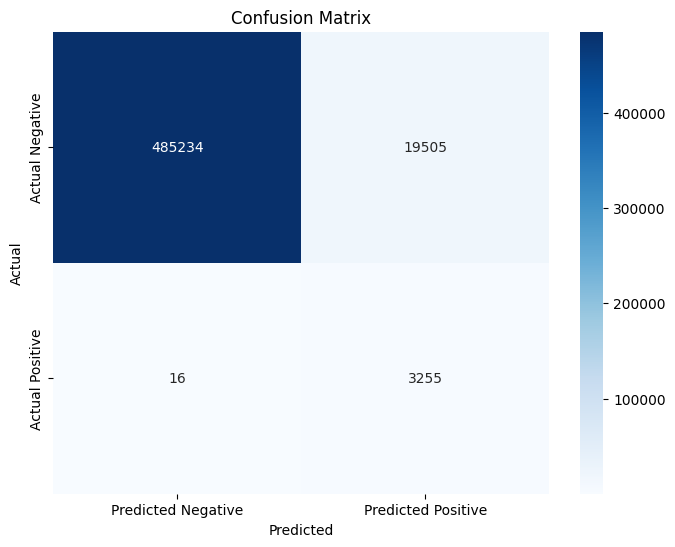

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =[[485234 , 19505],[    16 ,  3255]]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('final_CorrelationColumnsSVMbestPar.png', dpi=300, format='png')
# Show the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =[[490278 , 14461], [  1558 ,  1713]]  

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('init_KNN.png', dpi=300, format='png')
# Show the plot
plt.show()

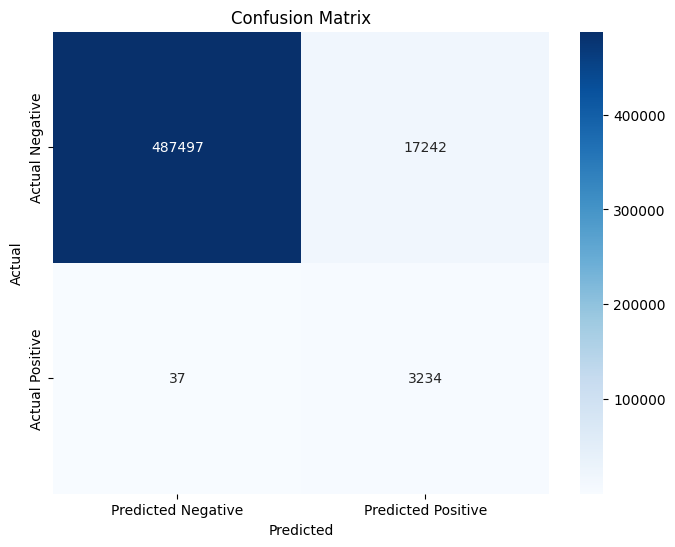

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =[[487497 , 17242], [    37 ,  3234]]  

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('final_KNN.png', dpi=300, format='png')
# Show the plot
plt.show()

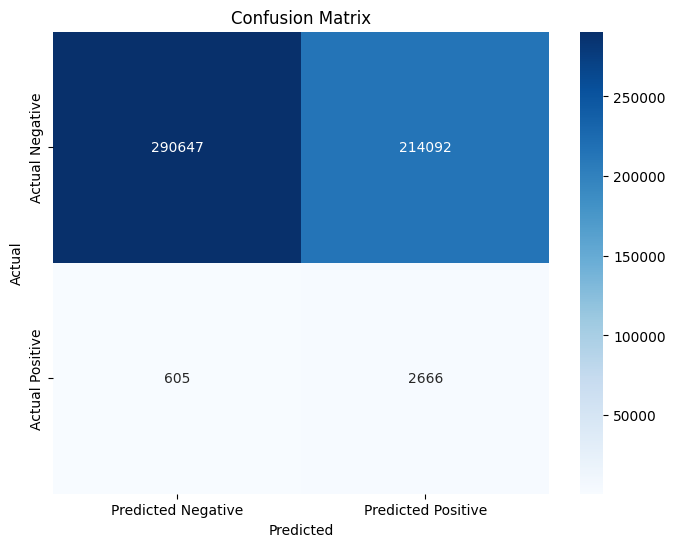

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =  [[290647, 214092],[   605  , 2666]] 


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('init_SVM.png', dpi=300, format='png')
# Show the plot
plt.show()

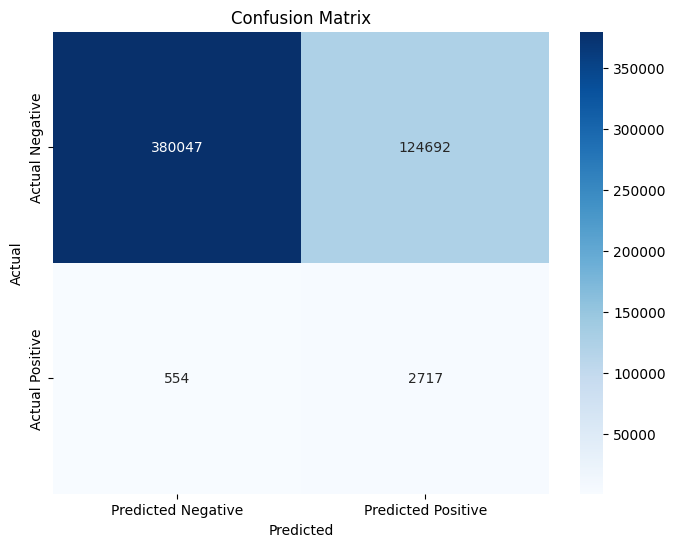

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =  [[380047, 124692], [   554  , 2717]] 


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('init_NB.png', dpi=300, format='png')
# Show the plot
plt.show()

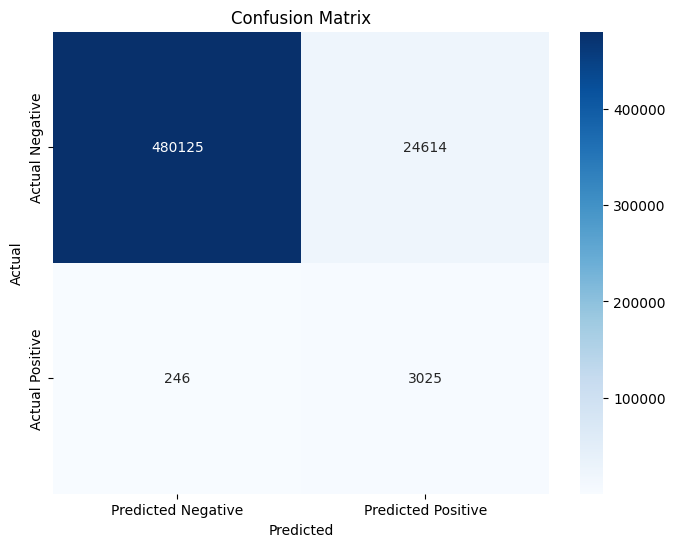

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix = [[480125 , 24614], [   246 ,  3025]] 


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('final_NB.png', dpi=300, format='png')
# Show the plot
plt.show()

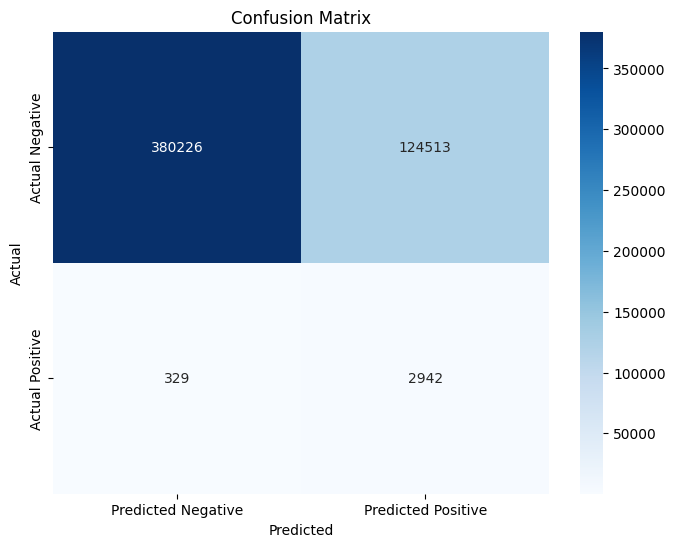

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =  [[380226, 124513], [   329 ,  2942]]  


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('init_LR.png', dpi=300, format='png')
# Show the plot
plt.show()

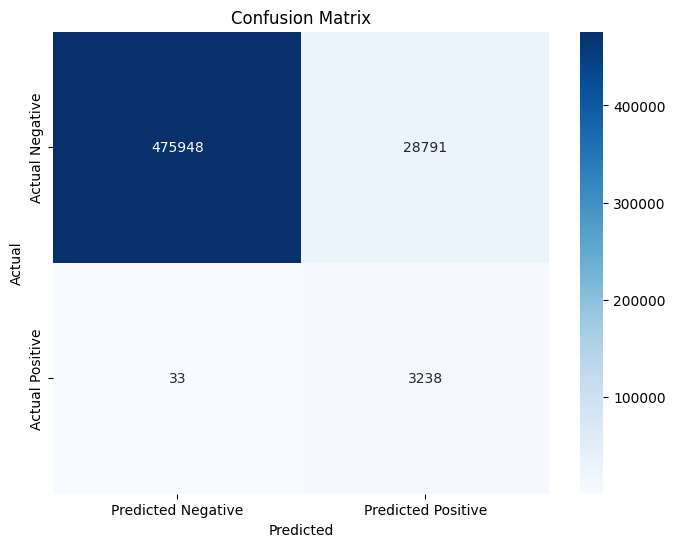

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
confusion_matrix =  [[475948,  28791], [    33 ,  3238]] 


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")



# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Save the figure as an SVG file
plt.savefig('final_LR.png', dpi=300, format='png')
# Show the plot
plt.show()